In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import data_vis
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [9]:
train_data.isnull().any()
test_data[test_data==-1] = None
test_data.isnull().any()
#train_data.head(10)

id                False
ps_ind_01         False
ps_ind_02_cat      True
ps_ind_03         False
ps_ind_04_cat      True
ps_ind_05_cat      True
ps_ind_06_bin     False
ps_ind_07_bin     False
ps_ind_08_bin     False
ps_ind_09_bin     False
ps_ind_10_bin     False
ps_ind_11_bin     False
ps_ind_12_bin     False
ps_ind_13_bin     False
ps_ind_14         False
ps_ind_15         False
ps_ind_16_bin     False
ps_ind_17_bin     False
ps_ind_18_bin     False
ps_reg_01         False
ps_reg_02         False
ps_reg_03          True
ps_car_01_cat      True
ps_car_02_cat      True
ps_car_03_cat      True
ps_car_04_cat     False
ps_car_05_cat      True
ps_car_06_cat     False
ps_car_07_cat      True
ps_car_08_cat     False
ps_car_09_cat      True
ps_car_10_cat     False
ps_car_11_cat     False
ps_car_11          True
ps_car_12         False
ps_car_13         False
ps_car_14          True
ps_car_15         False
ps_calc_01        False
ps_calc_02        False
ps_calc_03        False
ps_calc_04      

# Try Different Package for NN

In [2]:
import torch 
import torch.utils.data as Data
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

input_size = 235
hidden_size = [300,250,200]
num_classes = 2
num_epochs = 5
batch_size = 5000
learning_rate = 0.0005
weight_decay = 1e-5

# X_dev_tensor = torch.from_numpy(X_dev.values)
# y_dev_tensor = torch.from_numpy(y_dev.values)

# X_dev_tensor= X_dev_tensor.float()
# y_dev_tensor =y_dev_tensor.type(torch.LongTensor)
# #print(X_train_tensor)
# X_dev_Variable = Variable(X_dev_tensor)
# y_dev_Variable = Variable(y_dev_tensor)

X_train_tensor = torch.from_numpy(X_train.values)
y_train_tensor = torch.from_numpy(y_train.values)

X_train_tensor= X_train_tensor.float()
y_train_tensor =y_train_tensor.type(torch.LongTensor)
#print(X_train_tensor)
X_train_Variable = Variable(X_train_tensor)
y_train_Variable = Variable(y_train_tensor)


train_set = Data.TensorDataset(data_tensor=X_train_tensor, target_tensor=y_train_tensor )



train_loader = Data.DataLoader(
    dataset=train_set,      
    batch_size=batch_size,      # mini batch size
    shuffle=True,               # random shuffle for training
    num_workers=2)              # subprocesses for loading data


# train_loader = Data.DataLoader(dataset=train_dataset, 
#                                            batch_size=batch_size, 
#                                            shuffle=True)

# test_loader = Data.DataLoader(dataset=test_dataset, 
#                                           batch_size=batch_size, 
#                                           shuffle=False)
    
class My_Net(nn.Module):
    def __init__(self,input_size, hidden_size, num_classes):
        super(My_Net,self).__init__()
        self.fc1 = nn.Linear(input_size,hidden_size[0])
        self.fc2 = nn.Linear(hidden_size[0],hidden_size[1])
        self.fc3 = nn.Linear(hidden_size[1],hidden_size[2])
        self.fc4 = nn.Linear(hidden_size[2], num_classes)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        return out
        
net = My_Net(input_size, hidden_size,num_classes)
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate,weight_decay=weight_decay)

for epoch in range(num_epochs):
    for i,  (batch_x, batch_y) in enumerate(train_loader):
#         print(batch_x)
        x,  y = Variable(batch_x), Variable(batch_y)
        out = net(x)
        loss = criterion(out, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i % 10 ==0:
            print('epoch {}: iteration {}, the loss is {}'.format(epoch,i ,loss))

epoch 0: iteration 0, the loss is Variable containing:
 0.7110
[torch.FloatTensor of size 1]

epoch 0: iteration 10, the loss is Variable containing:
 0.1808
[torch.FloatTensor of size 1]

epoch 0: iteration 20, the loss is Variable containing:
 0.1641
[torch.FloatTensor of size 1]

epoch 0: iteration 30, the loss is Variable containing:
 0.1527
[torch.FloatTensor of size 1]

epoch 0: iteration 40, the loss is Variable containing:
 0.1607
[torch.FloatTensor of size 1]

epoch 0: iteration 50, the loss is Variable containing:
 0.1577
[torch.FloatTensor of size 1]

epoch 0: iteration 60, the loss is Variable containing:
 0.1616
[torch.FloatTensor of size 1]

epoch 0: iteration 70, the loss is Variable containing:
 0.1566
[torch.FloatTensor of size 1]

epoch 0: iteration 80, the loss is Variable containing:
 0.1624
[torch.FloatTensor of size 1]

epoch 0: iteration 90, the loss is Variable containing:
 0.1706
[torch.FloatTensor of size 1]

epoch 0: iteration 100, the loss is Variable contai

In [15]:
from sklearn.metrics import roc_auc_score            
#try to test it's accuracy
out=  net(X_train_Variable)
out = F.softmax(out)
score_1 = roc_auc_score(y_train_Variable.data.numpy(), out.data.numpy()[:,1])

X_val_tensor = torch.from_numpy(X_val.values)
y_val_tensor = torch.from_numpy(y_val.values)

X_val_tensor= X_val_tensor.float()
y_val_tensor =y_val_tensor.type(torch.LongTensor)
#print(X_train_tensor)
X_val_Variable = Variable(X_val_tensor)
y_val_Variable = Variable(y_val_tensor)
out2=  net(X_val_Variable)
out2 = F.softmax(out2)
score_2 = roc_auc_score(y_val_Variable.data.numpy(), out2.data.numpy()[:,1])

print(out.data.numpy()[:,1].shape)
print(out2.data.numpy()[:,1].shape)
print('test set auc is {}; Val set auc is {}'.format(score_1, score_2))


#So here I've tested that with Variable type, I can run this function
# for t in range(100):
#     out = net(X_train_tensor)                 # input x and predict based on x
#     loss = criterion(out, y_train_tensor)     # must be (1. nn output, 2. target), the target label is NOT one-hotted

#     optimizer.zero_grad()   # clear gradients for next train
#     loss.backward()         # backpropagation, compute gradients
#     optimizer.step()

epoch 0: iteration 0, the loss is Variable containing:
 0.7395
[torch.FloatTensor of size 1]

epoch 0: iteration 10, the loss is Variable containing:
 0.2306
[torch.FloatTensor of size 1]

epoch 0: iteration 20, the loss is Variable containing:
 0.1929
[torch.FloatTensor of size 1]

epoch 0: iteration 30, the loss is Variable containing:
 0.1489
[torch.FloatTensor of size 1]

epoch 0: iteration 40, the loss is Variable containing:
 0.1502
[torch.FloatTensor of size 1]

epoch 0: iteration 50, the loss is Variable containing:
 0.1642
[torch.FloatTensor of size 1]

epoch 0: iteration 60, the loss is Variable containing:
 0.1539
[torch.FloatTensor of size 1]

epoch 0: iteration 70, the loss is Variable containing:
 0.1650
[torch.FloatTensor of size 1]

epoch 0: iteration 80, the loss is Variable containing:
 0.1600
[torch.FloatTensor of size 1]

epoch 1: iteration 0, the loss is Variable containing:
 0.1538
[torch.FloatTensor of size 1]

epoch 1: iteration 10, the loss is Variable containi

In [11]:
print(out.data.numpy()[:,1].shape)
print(out2.data.numpy()[:,1].shape)

(446409,)
(446409,)


In [20]:
print('test set auc is {}; Val set auc is {}'.format(score_1, score_2))


test set auc is 0.6344029175708916; Val set auc is 0.6293206671721198


In [2]:
import data_util
import data_preprocess
import datetime

tic= datetime.datetime.now()
train_data = data_util.load_train_data()
test_data= data_util.load_test_data()

naive_pre = data_preprocess.naive_preprocess()
y_test_index = test_data['id']
test_data.drop(['id'], axis=1, inplace=True)
train_data = naive_pre.dtype_change(train_data)
test_data = naive_pre.dtype_change(test_data)
#train_prop is specified
#X_train, X_val, y_train, y_val = data_util.split_train(train_data,prop=0.75)
y_train = train_data['target']
train_data.drop(['target','id'], axis=1, inplace=True)
X_train = train_data

X_train = naive_pre.scale(X_train)
X_test = naive_pre.scale(test_data,test=True)

#result = y_test_index,

In [5]:
X_test_tensor = torch.from_numpy(X_test.values)

X_test_tensor= X_test_tensor.float()

#print(X_train_tensor)
X_test_Variable = Variable(X_test_tensor)

out=  net(X_test_Variable)
out = F.softmax(out)
#print(out)
prob = out.data.numpy()[:,1]

result = np.hstack((y_test_index, prob))

In [ ]:
np.savetxt("inter.csv", result, delimiter=",",header= 'id, target')

---

---

---

In [3]:
from scipy import special
import data_util
import data_preprocess
from sklearn.model_selection import train_test_split
import datetime
import numpy as np 

rso = np.random.RandomState(66)
tic= datetime.datetime.now()
train_data = data_util.load_train_data()
test_data= data_util.load_test_data()

naive_pre = data_preprocess.naive_preprocess()
train_data = naive_pre.dtype_change(train_data)

X, y = data_util.abandon_col(train_data)

X_train, X_train_test, y_train, y_train_test = train_test_split(X,y,test_size =0.1 ,random_state=rso)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size =0.2, random_state=rso)

X_train = naive_pre.scale(X_train)
X_val = naive_pre.scale(X_val,test=True)
X_train_test = naive_pre.scale(X_train_test,test=True)
X_dev, y_dev = X_train[:10000,:], y_train[:10000]

In [8]:
data ={}
#enter df here
data['X_train'] = X_train
data['X_val'] = X_val
try:
    data['y_train'] = y_train.values
    data['y_val'] =y_val.values
except:
    data['y_train'] = y_train
    data['y_val'] =y_val

In [12]:
# from MY_NN import NeuralNetwork

# #only use step decay for now
# #coarse search
# train_hist={}
# for i in range(100):
#     #learnning_rate 5e-4 too large
#     weight_decay = 10** (np.random.uniform(-5,3))#L2 
#     learning_rate = 10** (np.random.uniform(-6,-2))
    
#     nn_model = NeuralNetwork(data,learning_rate = learning_rate,num_epochs=5,verbose=None,
#                              weight_decay=weight_decay,batchnorm=True)
#     print('Learning rate is {}. Weight decay is {}'.format(learning_rate, weight_decay))
#     describe= 'Learning rate is {}. Weight decay is {}'.format(learning_rate, weight_decay)
#     nn_model.train()
#     train_hist[(nn_model.auc_history['val'][-1],nn_model.auc_history['train'][-1])]= describe
#     if i+1 %10 ==0:
#         print('You have finished {}!!'.format(i+1))

        
# filename= 'coarse_search_lr_wd.pkl'
# with open(filename, 'wb') as f:
#     pickle.dump(train_hist, f)
    
    
from MY_NN import NeuralNetwork
from datetime import datetime
#only use step decay for now
#coarse search
best_net = None
best_auc =0

#10.22. for 4 layers, best one has lr 3.305e-4, wd is 9.904e-3 0.6374
input_size = 235
hidden_size= [230,220,210]
lr_decay = {'step_size': 25, 'gamma':0.1}

train_hist={}
for i in range(20):
    #learnning_rate 5e-4 too large
    tic = datetime.now()
    dropout = np.random.uniform(0,1)
    weight_decay = 10** (np.random.uniform(-3,3))#L2 
    learning_rate = 10** (np.random.uniform(-6,-2))
    
    nn_model = NeuralNetwork(input_size = input_size, hidden_size=hidden_size,
                             learning_rate = learning_rate,num_epochs=5, batch_size=4096,
                             verbose=True,dropout=dropout,
                             weight_decay=weight_decay,lr_decay=lr_decay ,batchnorm=True)
    nn_model.train(data)
    describe= 'Learning rate is {}. Weight decay is {}. dropout is {}\n Val aus is {}. Train auc is {}' \
                .format(learning_rate, weight_decay, dropout,nn_model.auc_history['val'][-1],nn_model.auc_history['train'][-1])
    train_hist[(nn_model.auc_history['val'][-1],nn_model.auc_history['train'][-1])]= describe
    print(describe)
    toc = datetime.now()
    print('This is round you consume {} time to run this model.'.format(toc-tic))
    print('You have finished {}!!'.format(i+1))


Epoch 0: iteration 0, the loss is [ 1.36523724]
  acc for train: 0.042106908846534376, acc for val: 0.04148854748081913
  auc for train: 0.5157980563450647, auc for val: 0.5220829989898828
--------------------------------------------------------------
Epoch 0: iteration 100, the loss is [ 1.35413134]
  acc for train: 0.08038231066475013, acc for val: 0.07961694263473278
  auc for train: 0.520182009165457, auc for val: 0.533105490876729
--------------------------------------------------------------
Epoch 1: iteration 0, the loss is [ 1.34124649]
  acc for train: 0.08049431574231365, acc for val: 0.07987828781571431
  auc for train: 0.5202673264810951, auc for val: 0.5331885254310119
--------------------------------------------------------------
Epoch 1: iteration 100, the loss is [ 1.32655239]
  acc for train: 0.08387080214303048, acc for val: 0.08296776120517463
  auc for train: 0.5198906392694171, auc for val: 0.5327399057848122
--------------------------------------------------------

Epoch 0: iteration 0, the loss is [ 0.98713529]
  acc for train: 0.19252506113610485, acc for val: 0.19202337172618492
  auc for train: 0.4835921905016788, auc for val: 0.4820480584203207
--------------------------------------------------------------
Epoch 0: iteration 100, the loss is [ 0.73045838]
  acc for train: 0.7231001138718288, acc for val: 0.7260449140361029
  auc for train: 0.48875336353085275, auc for val: 0.4920095849666595
--------------------------------------------------------------
Epoch 1: iteration 0, the loss is [ 0.72516286]
  acc for train: 0.7337149284100879, acc for val: 0.736834736508055
  auc for train: 0.48872415474131925, auc for val: 0.4921091136641833
--------------------------------------------------------------
Epoch 1: iteration 100, the loss is [ 0.58176845]
  acc for train: 0.884641770426926, acc for val: 0.8874255632922026
  auc for train: 0.4874093336997529, auc for val: 0.4930200742694533
-------------------------------------------------------------

Epoch 0: iteration 0, the loss is [ 0.83644313]
  acc for train: 0.48297989508857736, acc for val: 0.4859246952528515
  auc for train: 0.5070903719773481, auc for val: 0.5055538075739823
--------------------------------------------------------------
Epoch 0: iteration 100, the loss is [ 0.81273586]
  acc for train: 0.8883332711082902, acc for val: 0.8900950176407997
  auc for train: 0.5077105051634889, auc for val: 0.5043055064055815
--------------------------------------------------------------
Epoch 1: iteration 0, the loss is [ 0.80850959]
  acc for train: 0.8876309059344024, acc for val: 0.8893483171237097
  auc for train: 0.5068455308163965, auc for val: 0.5035065027420473
--------------------------------------------------------------
Epoch 1: iteration 100, the loss is [ 0.79204297]
  acc for train: 0.890662043345965, acc for val: 0.8922417816274337
  auc for train: 0.5073687851899994, auc for val: 0.5038893851332228
--------------------------------------------------------------


Epoch 0: iteration 0, the loss is [ 0.88383162]
  acc for train: 0.8801989023502399, acc for val: 0.882693348765144
  auc for train: 0.5045674019883559, auc for val: 0.5056901837163883
--------------------------------------------------------------
Epoch 0: iteration 100, the loss is [ 0.81579244]
  acc for train: 0.1161095969683959, acc for val: 0.11458119434747709
  auc for train: 0.4917932093017904, auc for val: 0.488929861289618
--------------------------------------------------------------
Epoch 1: iteration 0, the loss is [ 0.8174814]
  acc for train: 0.12382161324646718, acc for val: 0.12234687972521421
  auc for train: 0.49142103947980537, auc for val: 0.4884512391928028
--------------------------------------------------------------
Epoch 1: iteration 100, the loss is [ 0.77820855]
  acc for train: 0.15764481323153318, acc for val: 0.1552857062853516
  auc for train: 0.4927367761656457, auc for val: 0.4890144808553868
-------------------------------------------------------------

Process Process-123:
Process Process-124:
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes()
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _boots

KeyboardInterrupt: 

In [ ]:
#choose the best and plot it to see how it's going.

lr =0.0021465415548623146
wd = 0.0804501958708467
nn_model = NeuralNetwork(data,learning_rate = lr,num_epochs=8,verbose=True,
                             weight_decay=wd,batchnorm=True)
nn_model.train()

In [13]:
a =sorted(train_hist, key=lambda x:x[0],reverse=True)
for i in a:
    print(train_hist[i])

Learning rate is 0.0009560008926958795. Weight decay is 77.6854555033499. dropout is 0.3261348398645527
 Val aus is 0.5530775352335148. Train auc is 0.5577496474875827
Learning rate is 0.0013127261406181013. Weight decay is 1.5989822278254577. dropout is 0.5575533337122203
 Val aus is 0.5423198705740515. Train auc is 0.5442397793810851
Learning rate is 0.007879870282127468. Weight decay is 0.0028137803098194584. dropout is 0.9809761910397172
 Val aus is 0.5358795967738799. Train auc is 0.5353599499477891
Learning rate is 4.051427101042863e-06. Weight decay is 2.080845035520147. dropout is 0.12910294315844584
 Val aus is 0.5321230719394038. Train auc is 0.5190528058213246
Learning rate is 4.694108791524344e-06. Weight decay is 1.7237375606873107. dropout is 0.8546539158580123
 Val aus is 0.5181411280494418. Train auc is 0.5164913483183406
Learning rate is 5.675065563963184e-06. Weight decay is 5.260775415682158. dropout is 0.7723558241169411
 Val aus is 0.5036813727365234. Train auc is 

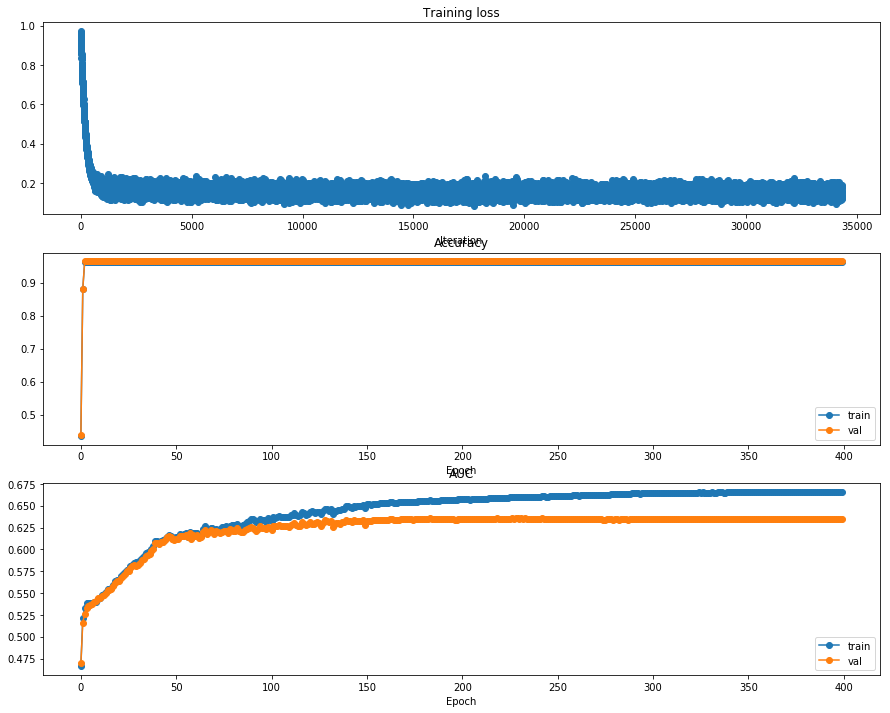

In [6]:
data_vis(nn_model)

Finer search here but should cost considerable time

In [ ]:
from MY_NN import NeuralNetwork
train_hist={}
best_net = None
best_auc =0
for i in range(10):
    #learnning_rate 5e-4 too large
    weight_decay = 10** (np.random.uniform(-5,-3))#L2 
    learning_rate = 10** (np.random.uniform(-5.5,-3))
    dropout = np.random.uniform(0,1)
    nn_model = NeuralNetwork(data,learning_rate = learning_rate,num_epochs=80,verbose=None,dropout=dropout,
                             weight_decay=weight_decay,batchnorm=True)
    print('Learning rate is {}. Weight decay is {}'.format(learning_rate, weight_decay))
    describe= 'Learning rate is {}. Weight decay is {}'.format(learning_rate, weight_decay)
    nn_model.train()
    print('Val aus is {}. Train auc is {}'.format(nn_model.auc_history['val'][-1],nn_model.auc_history['train'][-1]))
    if nn_model.auc_history['val'][-1]> best_auc:
        best_auc =nn_model.auc_history['val'][-1]
        best_net = nn_model
    train_hist[(nn_model.auc_history['val'][-1],nn_model.auc_history['train'][-1])]= describe
    if (i+1) %10 ==0:
        print('You have finished {}!!'.format(i+1))

train_hist['best_net'] = best_net
filename= 'search_lr_wd.pkl'
with open(filename, 'wb') as f:
    pickle.dump(train_hist, f)

Learning rate is 0.00020406927268633738. Weight decay is 0.0008021124318505044
Val aus is 0.6317421740076681. Train auc is 0.6791059413712075
Learning rate is 0.00015493820527177172. Weight decay is 0.0008104257925743996
Val aus is 0.6330116090802047. Train auc is 0.6654130268843802
Learning rate is 0.00011280697210265712. Weight decay is 0.00022878098723526239
Val aus is 0.6150286814657072. Train auc is 0.6313906017203497
Learning rate is 7.651260359148915e-06. Weight decay is 2.6327288973450546e-05
Val aus is 0.5515363038949513. Train auc is 0.5470427497716127
Learning rate is 5.55017362248129e-05. Weight decay is 0.0006954451651473917
Val aus is 0.6209540032022394. Train auc is 0.6257346869824794
Learning rate is 3.513556802668994e-06. Weight decay is 0.00010345946256136488
Val aus is 0.530607868619493. Train auc is 0.5191439264170947
Learning rate is 0.00041679711472788464. Weight decay is 0.00017450057767011
Val aus is 0.6299209582212122. Train auc is 0.7003492741546931
Learning r

In [5]:
from MY_NN import NeuralNetwork
#choose the best among finer search
lr =0.00015493820527177172
wd = 0.0008104257925743996
nn_model = NeuralNetwork(data,learning_rate = lr,num_epochs=80,verbose=True,
                             weight_decay=wd,batchnorm=True)
nn_model.train()

Epoch 0: iteration 0, the loss is [ 0.96388286]
  acc for train: 0.43534506897646025, acc for val: 0.4365957923425862
  auc for train: 0.46641468653097995, auc for val: 0.4694342688795342
--------------------------------------------------------------
Epoch 0: iteration 100, the loss is [ 0.63663191]
  acc for train: 0.8803925777968601, acc for val: 0.8812652840262092
  auc for train: 0.5210164423005953, auc for val: 0.5161746400086831
--------------------------------------------------------------
Epoch 0: iteration 200, the loss is [ 0.45769787]
  acc for train: 0.9634326756146279, acc for val: 0.9639250312680842
  auc for train: 0.5328574174698167, auc for val: 0.5266127325223127
--------------------------------------------------------------
Epoch 0: iteration 300, the loss is [ 0.35054463]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.5385647540666245, auc for val: 0.5334625369541983
-----------------------------------------------------------

The most expensive search final

In [ ]:
hidden_size = [230,220,210,200]
from MY_NN import NeuralNetwork
from datetime import datetime
train_hist={}
best_net = None
best_auc =0

#10.22. for 4 layers, best one has lr 3.305e-4, wd is 9.904e-3 0.6374

for i in range(5):
    #learnning_rate 5e-4 too large
    tic = datetime.now()
    weight_decay = 10** (np.random.uniform(-3,-1))#L2 
    learning_rate = 10** (np.random.uniform(-4,np.log10(5e-4)))
    dropout = np.random.uniform(0,1)
    nn_model = NeuralNetwork(data,hidden_size=hidden_size,learning_rate = learning_rate,num_epochs=55,verbose=None,dropout=dropout,
                             weight_decay=weight_decay,batchnorm=True)
    print('Learning rate is {}. Weight decay is {}. dropout is {}'.format(learning_rate, weight_decay,dropout))
    describe= 'Learning rate is {}. Weight decay is {}. dropout is {}'.format(learning_rate, weight_decay, dropout)
    nn_model.train()
    print('Val aus is {}. Train auc is {}'.format(nn_model.auc_history['val'][-1],nn_model.auc_history['train'][-1]))
    if nn_model.auc_history['val'][-1]> best_auc:
        best_auc =nn_model.auc_history['val'][-1]
        best_net = nn_model
    train_hist[(nn_model.auc_history['val'][-1],nn_model.auc_history['train'][-1])]= describe
    toc = datetime.now()
    print('This is round you consume {} time to run this model.'.format(toc-tic))
    print('You have finished {}!!'.format(i+1))

train_hist['best_net'] = best_net
filename= 'search_lr_wd2.pkl'
with open(filename, 'wb') as f:
    pickle.dump(train_hist, f)

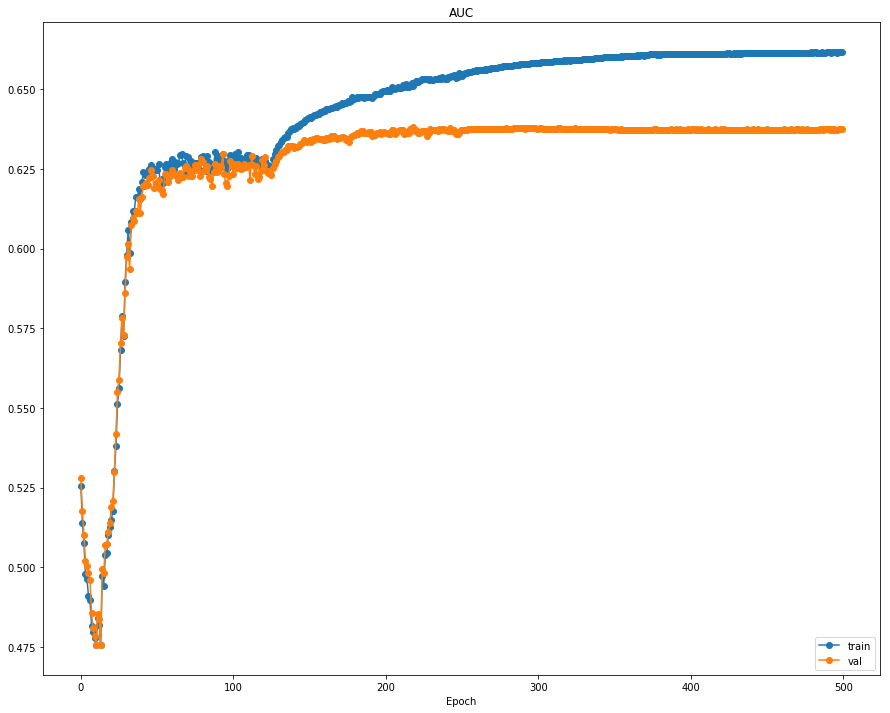

In [10]:
nn_model= best_net

data_vis.nnplot(nn_model, loss=False, acc=False)

# New processing: preprocess cell

In [2]:
import data_util
import data_preprocess
from sklearn.model_selection import train_test_split
from datetime import datetime
import numpy as np 

rso = np.random.RandomState(66)

train_data = data_util.load_train_data()
test_data= data_util.load_test_data()

lv1_pre = data_preprocess.preprocess_cell()

X_train = train_data.drop(['id','target'],axis=1)
y_train = train_data['target']
y_train

X_train, X_train_test, y_train, y_train_test = train_test_split(X_train,y_train,test_size =0.1 ,random_state=rso)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size =0.2, random_state=rso)

X_train, y_train, col = lv1_pre.process(X_train, y=y_train, rso =rso, oversample= None)
X_val = lv1_pre.process(X_val,test=True,rso =rso)
X_train_test = lv1_pre.process(X_train_test,test=True,rso =rso)
#X_dev, y_dev = X_train[:10000,:], y_train[:10000]

In [3]:
data ={}
#enter df here
data['X_train'] = X_train.values
data['X_val'] = X_val.values
data['y_train'] = y_train.values
data['y_val'] =y_val.values
#X_train = None
#X_val = None
print(type(X_train), type(X_val),type(y_train), type(y_val))
X_val.describe()

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,...,ps_calc_16_bin_0,ps_calc_16_bin_1,ps_calc_17_bin_0,ps_calc_17_bin_1,ps_calc_18_bin_0,ps_calc_18_bin_1,ps_calc_19_bin_0,ps_calc_19_bin_1,ps_calc_20_bin_0,ps_calc_20_bin_1
count,1.071380e+05,1.071380e+05,1.071380e+05,1.071380e+05,1.071380e+05,1.071380e+05,1.071380e+05,1.071380e+05,1.071380e+05,1.071380e+05,...,107138.000000,107138.000000,107138.000000,107138.000000,107138.000000,107138.000000,107138.000000,107138.000000,107138.000000,107138.000000
mean,6.940422e-17,4.166575e-17,-7.295236e-18,2.676025e-17,9.390959e-17,-2.294683e-16,-7.296563e-16,-1.314883e-16,-1.353366e-15,-4.194761e-16,...,0.372809,0.627191,0.445808,0.554192,0.713622,0.286378,0.650255,0.349745,0.846908,0.153092
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,0.483554,0.483554,0.497057,0.497057,0.452070,0.452070,0.476892,0.476892,0.360078,0.360078
min,-9.594890e-01,-1.638316e+00,-9.787887e-02,-2.056526e+00,-2.122196e+00,-1.086670e+00,-2.621268e+00,-2.828311e+00,-4.102093e+00,-2.237630e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-9.594890e-01,-8.979692e-01,-9.787887e-02,-6.475388e-01,-7.316796e-01,-5.931496e-01,-7.247620e-01,-4.174239e-01,-1.096969e+00,-6.345823e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-4.575813e-01,-1.576221e-01,-9.787887e-02,-8.394377e-02,3.112074e-01,-3.463895e-01,-5.239479e-03,7.880198e-01,-1.009484e-01,-2.125311e-01,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,5.462342e-01,5.827250e-01,-9.787887e-02,7.614488e-01,1.006465e+00,3.938907e-01,3.355959e-01,7.880198e-01,3.431724e-01,4.114085e-01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,2.553865e+00,2.433593e+00,3.132249e+01,1.606841e+00,1.006465e+00,3.355012e+00,1.004244e+01,7.880198e-01,1.521199e+01,1.286470e+01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from MY_NN import NeuralNetwork
from datetime import datetime
#only use step decay for now
#coarse search
best_net = None
best_auc =0

#10.22. for 4 layers, best one has lr 3.305e-4, wd is 9.904e-3 0.6374
input_size = 237
hidden_size= [230,220,210]
lr_decay = {'step_size': 25, 'gamma':0.1}

train_hist={}
for i in range(100):
    #learnning_rate 5e-4 too large
    tic = datetime.now()
    dropout = np.random.uniform(0,1)
    weight_decay = 10** (np.random.uniform(-3,3))#L2 
    learning_rate = 10** (np.random.uniform(-6,-2))
    
    nn_model = NeuralNetwork(data,input_size = input_size, hidden_size=hidden_size,
                             learning_rate = learning_rate,num_epochs=5,batch_size =512, 
                             verbose=None,dropout=dropout,
                             weight_decay=weight_decay,lr_decay=lr_decay ,batchnorm=True)
    nn_model.train()
    describe= 'Learning rate is {}. Weight decay is {}. dropout is {}\n Val aus is {}. Train auc is {}' \
                .format(learning_rate, weight_decay, dropout,nn_model.auc_history['val'][-1],nn_model.auc_history['train'][-1])
    train_hist[(nn_model.auc_history['val'][-1],nn_model.auc_history['train'][-1])]= describe
    print(describe)
    toc = datetime.now()
    print('This is round you consume {} time to run this model.'.format(toc-tic))
    print('You have finished {}!!'.format(i+1))


In [9]:
for i in sorted(train_hist, key =lambda x:x[0], reverse=True):
    print(train_hist[i])


Learning rate is 0.0001697748323692106. Weight decay is 0.01611014195754915. dropout is 0.8633795643083599
 Val aus is 0.6003277112111378. Train auc is 0.6346519767601385
Learning rate is 0.00011292573215690098. Weight decay is 0.0025168409474830154. dropout is 0.7474963413998843
 Val aus is 0.5997970907137983. Train auc is 0.633021357700171
Learning rate is 0.0004576885112175419. Weight decay is 0.7826435311885301. dropout is 0.6981187592989551
 Val aus is 0.5951053802842754. Train auc is 0.6484250603014419
Learning rate is 0.0035761607375581514. Weight decay is 0.00729795832118471. dropout is 0.8336651558501216
 Val aus is 0.5949200266604695. Train auc is 0.6517912182364991
Learning rate is 6.0618015129868076e-05. Weight decay is 0.00496681831649462. dropout is 0.5197983413792601
 Val aus is 0.593480985335158. Train auc is 0.657112285152382
Learning rate is 2.520241184671594e-05. Weight decay is 0.008209244622133769. dropout is 0.39878113804746995
 Val aus is 0.5896564177744055. Trai

# Finer Search

In [ ]:
from MY_NN import NeuralNetwork
from datetime import datetime
best_net = None
best_auc =0

#10.22. for 4 layers, best one has lr 3.305e-4, wd is 9.904e-3 0.6374
input_size = 238
hidden_size= [220,200,200]
lr_decay = {'step_size': 5, 'gamma':0.5}

train_hist={}

for i in range(10):
    tic = datetime.now()
#     dropout = np.random.uniform(0.5,1)
#     weight_decay = 10** (np.random.uniform(-1,1))#L2 
#     learning_rate = 10** (np.random.uniform(-4,-2))
    
    
    dropout = 0.75
    #During this training, I will set 1e-3 as upper bound for learning_rate, 0.1 for upper bound of weight_decay
    weight_decay = 10** (np.random.uniform(-3,-1))#L2 
    learning_rate = 10** (np.random.uniform(-4,-2))
    
    nn_model = NeuralNetwork(input_size = input_size, hidden_size=hidden_size,
                             learning_rate = learning_rate,num_epochs=80,batch_size =512,
                             verbose=True,dropout=dropout,
                             weight_decay=weight_decay,lr_decay=lr_decay)
    try:
        nn_model.train(data)
        describe= 'Learning rate is {}. Weight decay is {}. dropout is {}\n Val aus is {}. Train auc is {}' \
                    .format(learning_rate, weight_decay, dropout,nn_model.auc_history['val'][-1],nn_model.auc_history['train'][-1])
        train_hist[(nn_model.auc_history['val'][-1],nn_model.auc_history['train'][-1])]= describe
        print(describe)
        if nn_model.auc_history['val'][-1]> best_auc:
            best_auc =nn_model.auc_history['val'][-1]
            best_net = nn_model
        toc = datetime.now()
        print('This is round you consume {} time to run this model.'.format(toc-tic))
        print('You have finished {}!!'.format(i+1))
    except:
        describe= 'BLOWINGUP: Learning rate is {}. Weight decay is {}. dropout is {}\n Val aus is {}. Train auc is {}' \
                    .format(learning_rate, weight_decay, dropout,nn_model.auc_history['val'][-1],nn_model.auc_history['train'][-1])
        train_hist[(nn_model.auc_history['val'][-1],nn_model.auc_history['train'][-1])]= describe
        print(describe)
        print("WARNING: YOUR TRAINING IS BLOWING UP THIS TIME!")
        0.0005358686327667781 0.04687949688795907
        0.00029890640322661804 0.03493291532559407
        0.0008203039459907334 0.014601620731181977

Epoch 0: iteration 0, the loss is [ 1.22688496]
  acc for train: 0.5463561014766003, acc for val: 0.5452780526050515
  auc for train: 0.4855649203504382, auc for val: 0.48279902558555865
--------------------------------------------------------------
Epoch 0: iteration 100, the loss is [ 0.27840167]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.4946628301856943, auc for val: 0.494118915746092
--------------------------------------------------------------
Epoch 0: iteration 200, the loss is [ 0.24782151]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.5159274484134839, auc for val: 0.5223581356832782
--------------------------------------------------------------
Epoch 0: iteration 300, the loss is [ 0.21881074]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.48722805483905945, auc for val: 0.4974772067579898
------------------------------------------------------------

Epoch 3: iteration 600, the loss is [ 0.1581282]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6139256177572145, auc for val: 0.6110786110666389
--------------------------------------------------------------
Epoch 3: iteration 700, the loss is [ 0.14576435]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.613849725409405, auc for val: 0.6115788005964234
--------------------------------------------------------------
Epoch 3: iteration 800, the loss is [ 0.2118741]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.615094080489703, auc for val: 0.6142185050374146
--------------------------------------------------------------
Epoch 4: iteration 0, the loss is [ 0.19112757]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6182839726543787, auc for val: 0.6150361366580714
--------------------------------------------------------------
Ep

Epoch 7: iteration 300, the loss is [ 0.16109361]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6170118181934356, auc for val: 0.6142476642368604
--------------------------------------------------------------
Epoch 7: iteration 400, the loss is [ 0.16524056]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6186713611396639, auc for val: 0.6175284362838513
--------------------------------------------------------------
Epoch 7: iteration 500, the loss is [ 0.17348784]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6125395654501457, auc for val: 0.6114161871887889
--------------------------------------------------------------
Epoch 7: iteration 600, the loss is [ 0.16596884]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6152917365209037, auc for val: 0.6108606199889328
-----------------------------------------------------------

Epoch 11: iteration 0, the loss is [ 0.15993632]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6200218330994458, auc for val: 0.618693439773533
--------------------------------------------------------------
Epoch 11: iteration 100, the loss is [ 0.21150658]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6215460825316469, auc for val: 0.6240318662136235
--------------------------------------------------------------
Epoch 11: iteration 200, the loss is [ 0.23232685]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.621337965075242, auc for val: 0.6231374523764819
--------------------------------------------------------------
Epoch 11: iteration 300, the loss is [ 0.17256682]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6163620532559626, auc for val: 0.6189343765550654
-----------------------------------------------------------

Epoch 14: iteration 600, the loss is [ 0.18534395]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6168435842104678, auc for val: 0.6216186768291037
--------------------------------------------------------------
Epoch 14: iteration 700, the loss is [ 0.16301398]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6210380219321445, auc for val: 0.6214350184784524
--------------------------------------------------------------
Epoch 14: iteration 800, the loss is [ 0.19823514]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.618090243319511, auc for val: 0.619529495116631
--------------------------------------------------------------
Epoch 15: iteration 0, the loss is [ 0.15687208]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.622538120879466, auc for val: 0.6219737970862933
------------------------------------------------------------

Epoch 18: iteration 300, the loss is [ 0.19948843]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6276233353957539, auc for val: 0.6254808987496767
--------------------------------------------------------------
Epoch 18: iteration 400, the loss is [ 0.15125354]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6291850585321969, auc for val: 0.6255533118475441
--------------------------------------------------------------
Epoch 18: iteration 500, the loss is [ 0.14314985]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6289653883133007, auc for val: 0.6270013420047922
--------------------------------------------------------------
Epoch 18: iteration 600, the loss is [ 0.17078473]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6271389858553589, auc for val: 0.6266462568308607
-------------------------------------------------------

Epoch 22: iteration 0, the loss is [ 0.17061719]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6316962878529719, auc for val: 0.6313533725696474
--------------------------------------------------------------
Epoch 22: iteration 100, the loss is [ 0.19363125]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6310436407152887, auc for val: 0.6319958447589482
--------------------------------------------------------------
Epoch 22: iteration 200, the loss is [ 0.21334679]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6316287104301566, auc for val: 0.6298962195122978
--------------------------------------------------------------
Epoch 22: iteration 300, the loss is [ 0.16844472]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6316004648217219, auc for val: 0.6298268060330052
---------------------------------------------------------

Epoch 25: iteration 600, the loss is [ 0.17909606]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6336957783061314, auc for val: 0.6305191916749153
--------------------------------------------------------------
Epoch 25: iteration 700, the loss is [ 0.11303186]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6340697273966918, auc for val: 0.63137643480001
--------------------------------------------------------------
Epoch 25: iteration 800, the loss is [ 0.14216597]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6340283354986384, auc for val: 0.6324499937772323
--------------------------------------------------------------
Epoch 26: iteration 0, the loss is [ 0.15953694]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.634041721404773, auc for val: 0.6321441654977928
------------------------------------------------------------

Epoch 29: iteration 300, the loss is [ 0.17287394]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6359764837846761, auc for val: 0.6327644212138478
--------------------------------------------------------------
Epoch 29: iteration 400, the loss is [ 0.1433854]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6363154750671174, auc for val: 0.6320783630881462
--------------------------------------------------------------
Epoch 29: iteration 500, the loss is [ 0.1910692]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6365259191225975, auc for val: 0.6317321840499
--------------------------------------------------------------
Epoch 29: iteration 600, the loss is [ 0.16163303]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6367123477286993, auc for val: 0.6327051467961707
------------------------------------------------------------

Epoch 33: iteration 0, the loss is [ 0.14879474]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6384253590135033, auc for val: 0.633935886287903
--------------------------------------------------------------
Epoch 33: iteration 100, the loss is [ 0.18621586]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6380374248209268, auc for val: 0.6340547182952696
--------------------------------------------------------------
Epoch 33: iteration 200, the loss is [ 0.16300793]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6379786410150683, auc for val: 0.633775658541825
--------------------------------------------------------------
Epoch 33: iteration 300, the loss is [ 0.1759529]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6378359654572511, auc for val: 0.6335610003736467
------------------------------------------------------------

Epoch 36: iteration 600, the loss is [ 0.15436897]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6399945261848481, auc for val: 0.6341819702846005
--------------------------------------------------------------
Epoch 36: iteration 700, the loss is [ 0.17272322]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6402468411395268, auc for val: 0.6342949910008435
--------------------------------------------------------------
Epoch 36: iteration 800, the loss is [ 0.18425497]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6401691400734996, auc for val: 0.6341775761065129
--------------------------------------------------------------
Epoch 37: iteration 0, the loss is [ 0.12237199]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6400808004206374, auc for val: 0.634202356163553
----------------------------------------------------------

Epoch 40: iteration 300, the loss is [ 0.13750881]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6414359353178217, auc for val: 0.634197312945189
--------------------------------------------------------------
Epoch 40: iteration 400, the loss is [ 0.13630524]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6414830627850175, auc for val: 0.6344280342337221
--------------------------------------------------------------
Epoch 40: iteration 500, the loss is [ 0.17067435]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6414975059410576, auc for val: 0.6343432392516625
--------------------------------------------------------------
Epoch 40: iteration 600, the loss is [ 0.17996114]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6416359234360891, auc for val: 0.6344181908738542
--------------------------------------------------------

Epoch 44: iteration 0, the loss is [ 0.17667571]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6425085754055386, auc for val: 0.6344277949157824
--------------------------------------------------------------
Epoch 44: iteration 100, the loss is [ 0.16439095]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6424736675304098, auc for val: 0.634479990033147
--------------------------------------------------------------
Epoch 44: iteration 200, the loss is [ 0.15773065]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6423616348283266, auc for val: 0.6342986634661915
--------------------------------------------------------------
Epoch 44: iteration 300, the loss is [ 0.16661018]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6423922325434015, auc for val: 0.6344226163762795
----------------------------------------------------------

Epoch 47: iteration 600, the loss is [ 0.17089829]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6429361455708797, auc for val: 0.6344315751368517
--------------------------------------------------------------
Epoch 47: iteration 700, the loss is [ 0.12989977]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6429144907306626, auc for val: 0.6343927818241137
--------------------------------------------------------------
Epoch 47: iteration 800, the loss is [ 0.14929326]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6428922610426941, auc for val: 0.6344138129844221
--------------------------------------------------------------
Epoch 48: iteration 0, the loss is [ 0.15123115]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6429021479293292, auc for val: 0.6344970580382541
---------------------------------------------------------

Epoch 51: iteration 300, the loss is [ 0.16556892]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6432542536555813, auc for val: 0.6344807606118537
--------------------------------------------------------------
Epoch 51: iteration 400, the loss is [ 0.14669326]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6432195079467268, auc for val: 0.6344378663168284
--------------------------------------------------------------
Epoch 51: iteration 500, the loss is [ 0.16148505]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6433040550885049, auc for val: 0.634463021012947
--------------------------------------------------------------
Epoch 51: iteration 600, the loss is [ 0.16186285]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.643265627478642, auc for val: 0.6344355671104439
---------------------------------------------------------

Epoch 55: iteration 0, the loss is [ 0.16743027]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6430861816842964, auc for val: 0.6345932062132571
--------------------------------------------------------------
Epoch 55: iteration 100, the loss is [ 0.2097268]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6435270376579052, auc for val: 0.6344218244970233
--------------------------------------------------------------
Epoch 55: iteration 200, the loss is [ 0.19533111]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6434214145430354, auc for val: 0.6344319873651354
--------------------------------------------------------------
Epoch 55: iteration 300, the loss is [ 0.19042332]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6434521596609152, auc for val: 0.6344383888067807
----------------------------------------------------------

Epoch 58: iteration 600, the loss is [ 0.18293819]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6436221903812753, auc for val: 0.6344453991935501
--------------------------------------------------------------
Epoch 58: iteration 700, the loss is [ 0.14289436]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6435146234353909, auc for val: 0.6343578764881667
--------------------------------------------------------------
Epoch 58: iteration 800, the loss is [ 0.16269484]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6434546142615875, auc for val: 0.6343541927460572
--------------------------------------------------------------
Epoch 59: iteration 0, the loss is [ 0.12750195]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6436526083839629, auc for val: 0.6343921966854861
---------------------------------------------------------

Epoch 62: iteration 300, the loss is [ 0.15864463]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6436749859385106, auc for val: 0.6344479176702985
--------------------------------------------------------------
Epoch 62: iteration 400, the loss is [ 0.16295844]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6436205711146963, auc for val: 0.6344690553333548
--------------------------------------------------------------
Epoch 62: iteration 500, the loss is [ 0.15400165]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6436656225753152, auc for val: 0.6345049780837894
--------------------------------------------------------------
Epoch 62: iteration 600, the loss is [ 0.14386308]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6437665279501662, auc for val: 0.6344413934372496
-------------------------------------------------------

Epoch 66: iteration 0, the loss is [ 0.16104364]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6437910399468025, auc for val: 0.6342854759200344
--------------------------------------------------------------
Epoch 66: iteration 100, the loss is [ 0.14472061]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6437851766079503, auc for val: 0.6344760481784952
--------------------------------------------------------------
Epoch 66: iteration 200, the loss is [ 0.14382459]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6437212948447691, auc for val: 0.634450471230305
--------------------------------------------------------------
Epoch 66: iteration 300, the loss is [ 0.14887063]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6435548054246295, auc for val: 0.6343756875065631
----------------------------------------------------------

Epoch 69: iteration 600, the loss is [ 0.15017578]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6438224171112152, auc for val: 0.6344791455290036
--------------------------------------------------------------
Epoch 69: iteration 700, the loss is [ 0.17738484]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.643768288281307, auc for val: 0.6344589789204148
--------------------------------------------------------------
Epoch 69: iteration 800, the loss is [ 0.15814629]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6438140800796649, auc for val: 0.6344994549765722
--------------------------------------------------------------
Epoch 70: iteration 0, the loss is [ 0.13277444]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.643982254544982, auc for val: 0.6344880128225099
-----------------------------------------------------------

Epoch 73: iteration 300, the loss is [ 0.17872751]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6436989364595426, auc for val: 0.6344661747472632
--------------------------------------------------------------
Epoch 73: iteration 400, the loss is [ 0.16453937]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6436857325846643, auc for val: 0.6343780430967555
--------------------------------------------------------------
Epoch 73: iteration 500, the loss is [ 0.15501408]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6437048151029339, auc for val: 0.634471434730044
--------------------------------------------------------------
Epoch 73: iteration 600, the loss is [ 0.16377009]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6437388370153185, auc for val: 0.6344453415567688
--------------------------------------------------------

Epoch 77: iteration 0, the loss is [ 0.16883609]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6438603098351776, auc for val: 0.6344220588030691
--------------------------------------------------------------
Epoch 77: iteration 100, the loss is [ 0.17733471]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6437399190771276, auc for val: 0.6344573462959356
--------------------------------------------------------------
Epoch 77: iteration 200, the loss is [ 0.20897159]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6436537503499009, auc for val: 0.6344426814940143
--------------------------------------------------------------
Epoch 77: iteration 300, the loss is [ 0.16649891]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.643713930269796, auc for val: 0.634410649226318
-----------------------------------------------------------

Epoch 0: iteration 500, the loss is [ 0.23693654]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.48134635819251603, auc for val: 0.4904199387318008
--------------------------------------------------------------
Epoch 0: iteration 600, the loss is [ 0.20512325]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.4731281329941601, auc for val: 0.4832646493352163
--------------------------------------------------------------
Epoch 0: iteration 700, the loss is [ 0.15985098]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.46755646324937067, auc for val: 0.4775568137280669
--------------------------------------------------------------
Epoch 0: iteration 800, the loss is [ 0.15797782]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.4514525704316439, auc for val: 0.4618339658945022
---------------------------------------------------------

Epoch 4: iteration 200, the loss is [ 0.14751926]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6164933448649889, auc for val: 0.6145100982848457
--------------------------------------------------------------
Epoch 4: iteration 300, the loss is [ 0.16910174]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6182533934902604, auc for val: 0.6154952111152101
--------------------------------------------------------------
Epoch 4: iteration 400, the loss is [ 0.17212789]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6188910414842903, auc for val: 0.6180990792609389
--------------------------------------------------------------
Epoch 4: iteration 500, the loss is [ 0.10741019]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.619429355214858, auc for val: 0.6160036264160655
------------------------------------------------------------

Epoch 7: iteration 800, the loss is [ 0.17396322]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6273852481741379, auc for val: 0.6247402523272129
--------------------------------------------------------------
Epoch 8: iteration 0, the loss is [ 0.16387697]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.626742700331537, auc for val: 0.6234820025491696
--------------------------------------------------------------
Epoch 8: iteration 100, the loss is [ 0.14684004]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6267691133373978, auc for val: 0.6229861821380026
--------------------------------------------------------------
Epoch 8: iteration 200, the loss is [ 0.16758111]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6271093725776873, auc for val: 0.6263468788590332
--------------------------------------------------------------

Epoch 11: iteration 500, the loss is [ 0.13687104]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6312008271401359, auc for val: 0.630236865419539
--------------------------------------------------------------
Epoch 11: iteration 600, the loss is [ 0.16217864]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6306715076087377, auc for val: 0.6295618209309606
--------------------------------------------------------------
Epoch 11: iteration 700, the loss is [ 0.15499836]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6298611633538456, auc for val: 0.6277421350251563
--------------------------------------------------------------
Epoch 11: iteration 800, the loss is [ 0.1577993]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6308415807644098, auc for val: 0.6282635474201956
---------------------------------------------------------

Epoch 15: iteration 200, the loss is [ 0.14981256]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6318212498757829, auc for val: 0.6294634048739106
--------------------------------------------------------------
Epoch 15: iteration 300, the loss is [ 0.13997671]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.631852056598296, auc for val: 0.628879373874905
--------------------------------------------------------------
Epoch 15: iteration 400, the loss is [ 0.17529619]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6319903150961748, auc for val: 0.6279769372484004
--------------------------------------------------------------
Epoch 15: iteration 500, the loss is [ 0.16390738]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6333943824685816, auc for val: 0.6298087494318017
---------------------------------------------------------

Epoch 18: iteration 800, the loss is [ 0.19155177]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6371064902306156, auc for val: 0.6323584189555285
--------------------------------------------------------------
Epoch 19: iteration 0, the loss is [ 0.16040839]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.636538995382357, auc for val: 0.6313264298803347
--------------------------------------------------------------
Epoch 19: iteration 100, the loss is [ 0.15954676]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6362947224990267, auc for val: 0.6312416712345069
--------------------------------------------------------------
Epoch 19: iteration 200, the loss is [ 0.1653078]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6360312918114637, auc for val: 0.6307607787496976
-----------------------------------------------------------

Epoch 22: iteration 500, the loss is [ 0.1395344]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6398645563314426, auc for val: 0.6338825985776405
--------------------------------------------------------------
Epoch 22: iteration 600, the loss is [ 0.14513935]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.640136951150167, auc for val: 0.633080779482637
--------------------------------------------------------------
Epoch 22: iteration 700, the loss is [ 0.15365714]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6411269914827206, auc for val: 0.6339057610458836
--------------------------------------------------------------
Epoch 22: iteration 800, the loss is [ 0.12906034]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6406722300216152, auc for val: 0.6342044661709382
----------------------------------------------------------

Epoch 26: iteration 200, the loss is [ 0.14501467]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6435745533038569, auc for val: 0.6353839703230117
--------------------------------------------------------------
Epoch 26: iteration 300, the loss is [ 0.19996281]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6433147039556611, auc for val: 0.6349660861169293
--------------------------------------------------------------
Epoch 26: iteration 400, the loss is [ 0.19053583]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6436142288519945, auc for val: 0.6352090740160921
--------------------------------------------------------------
Epoch 26: iteration 500, the loss is [ 0.15050662]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6435909126963647, auc for val: 0.635364006696131
--------------------------------------------------------

Epoch 29: iteration 800, the loss is [ 0.16282126]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6454882539330679, auc for val: 0.6357239371186124
--------------------------------------------------------------
Epoch 30: iteration 0, the loss is [ 0.13929591]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.645756791157771, auc for val: 0.6355227058145309
--------------------------------------------------------------
Epoch 30: iteration 100, the loss is [ 0.16229254]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6455842068983062, auc for val: 0.6354621070038573
--------------------------------------------------------------
Epoch 30: iteration 200, the loss is [ 0.16093856]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6456976872706244, auc for val: 0.6354337321658267
----------------------------------------------------------

Epoch 33: iteration 500, the loss is [ 0.14568195]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6478083691400087, auc for val: 0.6356626353898016
--------------------------------------------------------------
Epoch 33: iteration 600, the loss is [ 0.17798841]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6479547388888429, auc for val: 0.6359341334481337
--------------------------------------------------------------
Epoch 33: iteration 700, the loss is [ 0.15853079]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6479648858753414, auc for val: 0.6358932201042226
--------------------------------------------------------------
Epoch 33: iteration 800, the loss is [ 0.16840248]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6481446407749926, auc for val: 0.6358607593195869
-------------------------------------------------------

Epoch 37: iteration 200, the loss is [ 0.20516577]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6489930117845049, auc for val: 0.6357098800088418
--------------------------------------------------------------
Epoch 37: iteration 300, the loss is [ 0.13881205]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6490654747561956, auc for val: 0.635812234161623
--------------------------------------------------------------
Epoch 37: iteration 400, the loss is [ 0.16835487]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6491087235276572, auc for val: 0.635904880275675
--------------------------------------------------------------
Epoch 37: iteration 500, the loss is [ 0.15544803]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6491767389076273, auc for val: 0.6358720573816959
---------------------------------------------------------

Epoch 40: iteration 800, the loss is [ 0.12670904]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6502768213473804, auc for val: 0.6361649624923884
--------------------------------------------------------------
Epoch 41: iteration 0, the loss is [ 0.16066013]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6504741816454229, auc for val: 0.63635320171418
--------------------------------------------------------------
Epoch 41: iteration 100, the loss is [ 0.15828499]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6504441732323866, auc for val: 0.6360408466957445
--------------------------------------------------------------
Epoch 41: iteration 200, the loss is [ 0.16446874]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6503931773497784, auc for val: 0.636012971794143
------------------------------------------------------------

Epoch 44: iteration 500, the loss is [ 0.18420471]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6510821960330251, auc for val: 0.6361177203792954
--------------------------------------------------------------
Epoch 44: iteration 600, the loss is [ 0.16478944]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6509878845182175, auc for val: 0.6360443211912783
--------------------------------------------------------------
Epoch 44: iteration 700, the loss is [ 0.14213991]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6510306724530119, auc for val: 0.6360412889953924
--------------------------------------------------------------
Epoch 44: iteration 800, the loss is [ 0.14249653]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.650981528728777, auc for val: 0.6359621862719732
--------------------------------------------------------

Epoch 48: iteration 200, the loss is [ 0.14681476]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6514323147972895, auc for val: 0.6359879799845802
--------------------------------------------------------------
Epoch 48: iteration 300, the loss is [ 0.1677313]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6513818124474086, auc for val: 0.6360649664357467
--------------------------------------------------------------
Epoch 48: iteration 400, the loss is [ 0.1575232]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6514042620415024, auc for val: 0.6360385913434327
--------------------------------------------------------------
Epoch 48: iteration 500, the loss is [ 0.15676704]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6513396982215026, auc for val: 0.6359689911710875
---------------------------------------------------------

Epoch 51: iteration 800, the loss is [ 0.14992693]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6516284730706734, auc for val: 0.635970303034349
--------------------------------------------------------------
Epoch 52: iteration 0, the loss is [ 0.14290582]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6516792319648179, auc for val: 0.6358002820473434
--------------------------------------------------------------
Epoch 52: iteration 100, the loss is [ 0.17638892]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6516460011734145, auc for val: 0.6360214218474716
--------------------------------------------------------------
Epoch 52: iteration 200, the loss is [ 0.18321015]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.651647769543303, auc for val: 0.6359821123096487
-----------------------------------------------------------

Epoch 55: iteration 500, the loss is [ 0.16730672]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6519325771159244, auc for val: 0.6360343876173179
--------------------------------------------------------------
Epoch 55: iteration 600, the loss is [ 0.14255704]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6519604530192635, auc for val: 0.6360646293858734
--------------------------------------------------------------
Epoch 55: iteration 700, the loss is [ 0.15125313]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6518337145878161, auc for val: 0.6360037799804985
--------------------------------------------------------------
Epoch 55: iteration 800, the loss is [ 0.13643011]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6518514029244402, auc for val: 0.6360125996610115
-------------------------------------------------------

Epoch 59: iteration 200, the loss is [ 0.17163762]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6520091182834229, auc for val: 0.635937124295894
--------------------------------------------------------------
Epoch 59: iteration 300, the loss is [ 0.20423058]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6519637984523059, auc for val: 0.6360636057065185
--------------------------------------------------------------
Epoch 59: iteration 400, the loss is [ 0.17331086]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6520016047597313, auc for val: 0.6359771743410592
--------------------------------------------------------------
Epoch 59: iteration 500, the loss is [ 0.16619442]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.651990524196368, auc for val: 0.6360434290741416
---------------------------------------------------------

Epoch 62: iteration 800, the loss is [ 0.15332493]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6519878819218566, auc for val: 0.6360176516501902
--------------------------------------------------------------
Epoch 63: iteration 0, the loss is [ 0.15398507]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6519490994476632, auc for val: 0.6360074800112636
--------------------------------------------------------------
Epoch 63: iteration 100, the loss is [ 0.16966835]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6520453001454605, auc for val: 0.6359990675471402
--------------------------------------------------------------
Epoch 63: iteration 200, the loss is [ 0.18650976]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6520210697368785, auc for val: 0.636018281895864
----------------------------------------------------------

Epoch 66: iteration 500, the loss is [ 0.13861623]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6520160125143637, auc for val: 0.636025034170091
--------------------------------------------------------------
Epoch 66: iteration 600, the loss is [ 0.11641718]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6520734611151582, auc for val: 0.6360093306531327
--------------------------------------------------------------
Epoch 66: iteration 700, the loss is [ 0.13837184]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6519691446832574, auc for val: 0.6359980714332023
--------------------------------------------------------------
Epoch 66: iteration 800, the loss is [ 0.16056678]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6520290214496118, auc for val: 0.6359565478911934
--------------------------------------------------------

Epoch 70: iteration 200, the loss is [ 0.13278136]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6520524495293434, auc for val: 0.6360132061001889
--------------------------------------------------------------
Epoch 70: iteration 300, the loss is [ 0.11585113]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6520849222823039, auc for val: 0.635962448143436
--------------------------------------------------------------
Epoch 70: iteration 400, the loss is [ 0.15421635]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6520614121918872, auc for val: 0.6360008818527777
--------------------------------------------------------------
Epoch 70: iteration 500, the loss is [ 0.13051794]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6520836045460567, auc for val: 0.6360256656687384
--------------------------------------------------------

Epoch 73: iteration 800, the loss is [ 0.13490067]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6521411633704487, auc for val: 0.6359602942819782
--------------------------------------------------------------
Epoch 74: iteration 0, the loss is [ 0.15400496]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6518940362679339, auc for val: 0.6358669339730274
--------------------------------------------------------------
Epoch 74: iteration 100, the loss is [ 0.15220235]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6520060671149213, auc for val: 0.6359577745522564
--------------------------------------------------------------
Epoch 74: iteration 200, the loss is [ 0.16376629]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6520560309460062, auc for val: 0.636034880035906
----------------------------------------------------------

Epoch 77: iteration 500, the loss is [ 0.20992255]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6520393769024793, auc for val: 0.6360068735720863
--------------------------------------------------------------
Epoch 77: iteration 600, the loss is [ 0.17661555]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6521373810623906, auc for val: 0.6359788683612402
--------------------------------------------------------------
Epoch 77: iteration 700, the loss is [ 0.18529996]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6521984768584463, auc for val: 0.6360611335897899
--------------------------------------------------------------
Epoch 77: iteration 800, the loss is [ 0.12021872]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6521538912587121, auc for val: 0.636070440676997
--------------------------------------------------------

Epoch 1: iteration 100, the loss is [ 0.20093232]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.5249345260430415, auc for val: 0.5385084041042841
--------------------------------------------------------------
Epoch 1: iteration 200, the loss is [ 0.18876381]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.5176796805161146, auc for val: 0.5323764595186714
--------------------------------------------------------------
Epoch 1: iteration 300, the loss is [ 0.17014645]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.5113951693367562, auc for val: 0.5256577524518085
--------------------------------------------------------------
Epoch 1: iteration 400, the loss is [ 0.17441703]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.5090518396179659, auc for val: 0.5237527716275155
-----------------------------------------------------------

Epoch 4: iteration 700, the loss is [ 0.17128272]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.4968013438226014, auc for val: 0.5136716625426798
--------------------------------------------------------------
Epoch 4: iteration 800, the loss is [ 0.19602317]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.48632590878183085, auc for val: 0.5032105704473628
--------------------------------------------------------------
Epoch 5: iteration 0, the loss is [ 0.11789013]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.4840565804500599, auc for val: 0.5014073160361243
--------------------------------------------------------------
Epoch 5: iteration 100, the loss is [ 0.16586407]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.4904036132210405, auc for val: 0.5074521000256971
------------------------------------------------------------

Epoch 8: iteration 400, the loss is [ 0.13332924]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.5543263738604836, auc for val: 0.5688382917805218
--------------------------------------------------------------
Epoch 8: iteration 500, the loss is [ 0.114853]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.5577311342517781, auc for val: 0.5718095530589373
--------------------------------------------------------------
Epoch 8: iteration 600, the loss is [ 0.2153535]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.5560806860663604, auc for val: 0.5706187759042248
--------------------------------------------------------------
Epoch 8: iteration 700, the loss is [ 0.15304773]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.5618206115914912, auc for val: 0.5763934125409056
--------------------------------------------------------------

Epoch 12: iteration 100, the loss is [ 0.15358487]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.5892958834588251, auc for val: 0.598272927380342
--------------------------------------------------------------
Epoch 12: iteration 200, the loss is [ 0.15740569]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.5919137842553752, auc for val: 0.6006934353831138
--------------------------------------------------------------
Epoch 12: iteration 300, the loss is [ 0.13139804]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.5909566586523111, auc for val: 0.6000252822488216
--------------------------------------------------------------
Epoch 12: iteration 400, the loss is [ 0.22086073]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.5913310878261554, auc for val: 0.600673741145537
---------------------------------------------------------

Epoch 15: iteration 700, the loss is [ 0.12816933]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6138212626774885, auc for val: 0.6156546419701379
--------------------------------------------------------------
Epoch 15: iteration 800, the loss is [ 0.16693166]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6140899272854232, auc for val: 0.6158983302814909
--------------------------------------------------------------
Epoch 16: iteration 0, the loss is [ 0.13664187]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6149670287789848, auc for val: 0.6166293288079538
--------------------------------------------------------------
Epoch 16: iteration 100, the loss is [ 0.16961937]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.620261474350112, auc for val: 0.6211506122870551
----------------------------------------------------------

Epoch 19: iteration 400, the loss is [ 0.16215523]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6253167252075452, auc for val: 0.6240788188898365
--------------------------------------------------------------
Epoch 19: iteration 500, the loss is [ 0.13700038]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6266608579191557, auc for val: 0.625033089777336
--------------------------------------------------------------
Epoch 19: iteration 600, the loss is [ 0.1207856]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6263181099135166, auc for val: 0.6248646964029154
--------------------------------------------------------------
Epoch 19: iteration 700, the loss is [ 0.20446002]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6270894226476297, auc for val: 0.625604859177606
----------------------------------------------------------

Epoch 23: iteration 100, the loss is [ 0.14968693]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6277391090527221, auc for val: 0.624802289551472
--------------------------------------------------------------
Epoch 23: iteration 200, the loss is [ 0.13636483]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6290759389485839, auc for val: 0.6260318976081276
--------------------------------------------------------------
Epoch 23: iteration 300, the loss is [ 0.17628843]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6292816259978553, auc for val: 0.6261363955985788
--------------------------------------------------------------
Epoch 23: iteration 400, the loss is [ 0.14479095]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6308829830200803, auc for val: 0.6274722758561708
--------------------------------------------------------

Epoch 26: iteration 700, the loss is [ 0.09937729]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6354165246439609, auc for val: 0.6299462394676549
--------------------------------------------------------------
Epoch 26: iteration 800, the loss is [ 0.14648181]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.634316691714567, auc for val: 0.6289852200648491
--------------------------------------------------------------
Epoch 27: iteration 0, the loss is [ 0.16148885]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6347083143009863, auc for val: 0.6295643018185035
--------------------------------------------------------------
Epoch 27: iteration 100, the loss is [ 0.13525893]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6345138510439186, auc for val: 0.6290503383509609
----------------------------------------------------------

Epoch 30: iteration 400, the loss is [ 0.14712897]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6381515574139426, auc for val: 0.6312088759059449
--------------------------------------------------------------
Epoch 30: iteration 500, the loss is [ 0.18935063]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.638689861714441, auc for val: 0.6316055598002956
--------------------------------------------------------------
Epoch 30: iteration 600, the loss is [ 0.14230533]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.638354772316429, auc for val: 0.6312516311209109
--------------------------------------------------------------
Epoch 30: iteration 700, the loss is [ 0.17018513]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.638456642650179, auc for val: 0.6313380725101582
----------------------------------------------------------

Epoch 34: iteration 100, the loss is [ 0.14637214]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6386794258740971, auc for val: 0.6310399437529166
--------------------------------------------------------------
Epoch 34: iteration 200, the loss is [ 0.16450991]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.638544446025819, auc for val: 0.6309524874551291
--------------------------------------------------------------
Epoch 34: iteration 300, the loss is [ 0.18022412]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6388895731915756, auc for val: 0.6312626347342459
--------------------------------------------------------------
Epoch 34: iteration 400, the loss is [ 0.14926839]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6387581530398826, auc for val: 0.6310206404430738
--------------------------------------------------------

Epoch 37: iteration 700, the loss is [ 0.15485018]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6397398612878076, auc for val: 0.6315841527479352
--------------------------------------------------------------
Epoch 37: iteration 800, the loss is [ 0.13131252]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6396764364192156, auc for val: 0.6315243119862333
--------------------------------------------------------------
Epoch 38: iteration 0, the loss is [ 0.16532099]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6401874886695689, auc for val: 0.6320529302319091
--------------------------------------------------------------
Epoch 38: iteration 100, the loss is [ 0.13319191]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6396203138253027, auc for val: 0.6315624800651913
---------------------------------------------------------

Epoch 41: iteration 400, the loss is [ 0.1369554]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.640537491181175, auc for val: 0.6319857508043789
--------------------------------------------------------------
Epoch 41: iteration 500, the loss is [ 0.13741215]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6404904501305164, auc for val: 0.6319761555332654
--------------------------------------------------------------
Epoch 41: iteration 600, the loss is [ 0.11020505]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6402884471465318, auc for val: 0.6318215423614705
--------------------------------------------------------------
Epoch 41: iteration 700, the loss is [ 0.14484403]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6404756552019716, auc for val: 0.6319330344500355
---------------------------------------------------------

Epoch 45: iteration 100, the loss is [ 0.18079738]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.640773110739154, auc for val: 0.6320453785605848
--------------------------------------------------------------
Epoch 45: iteration 200, the loss is [ 0.13816428]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6406180450750651, auc for val: 0.6319472870236731
--------------------------------------------------------------
Epoch 45: iteration 300, the loss is [ 0.20396636]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6408016770472419, auc for val: 0.6320395184034944
--------------------------------------------------------------
Epoch 45: iteration 400, the loss is [ 0.15726267]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6408184366766272, auc for val: 0.6320713389186683
--------------------------------------------------------

Epoch 48: iteration 700, the loss is [ 0.16110529]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6408440517594894, auc for val: 0.6320541756875748
--------------------------------------------------------------
Epoch 48: iteration 800, the loss is [ 0.12200464]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6407124162621147, auc for val: 0.631987005030859
--------------------------------------------------------------
Epoch 49: iteration 0, the loss is [ 0.16980968]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6409000409411099, auc for val: 0.6320178382029096
--------------------------------------------------------------
Epoch 49: iteration 100, the loss is [ 0.16377629]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6407775427944489, auc for val: 0.6320155189489489
----------------------------------------------------------

Epoch 52: iteration 400, the loss is [ 0.17840277]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6409743850570429, auc for val: 0.6321615141689652
--------------------------------------------------------------
Epoch 52: iteration 500, the loss is [ 0.15989481]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6410213423965122, auc for val: 0.6320804279884852
--------------------------------------------------------------
Epoch 52: iteration 600, the loss is [ 0.12645507]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6406035837545471, auc for val: 0.6317921438440851
--------------------------------------------------------------
Epoch 52: iteration 700, the loss is [ 0.16432288]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6409953600820152, auc for val: 0.6321013338514428
-------------------------------------------------------

Epoch 56: iteration 100, the loss is [ 0.13501377]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6410333617155489, auc for val: 0.632148585988324
--------------------------------------------------------------
Epoch 56: iteration 200, the loss is [ 0.16401981]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6410296161229246, auc for val: 0.6320789206613566
--------------------------------------------------------------
Epoch 56: iteration 300, the loss is [ 0.14171724]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6410826549295716, auc for val: 0.632156349412171
--------------------------------------------------------------
Epoch 56: iteration 400, the loss is [ 0.15935645]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6409351338620256, auc for val: 0.6320403516308764
---------------------------------------------------------

Epoch 59: iteration 700, the loss is [ 0.11965217]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6408877562661054, auc for val: 0.6320151605985259
--------------------------------------------------------------
Epoch 59: iteration 800, the loss is [ 0.14438637]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6409969535318469, auc for val: 0.6320304406104391
--------------------------------------------------------------
Epoch 60: iteration 0, the loss is [ 0.13981429]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6410280299388841, auc for val: 0.6319841758166811
--------------------------------------------------------------
Epoch 60: iteration 100, the loss is [ 0.1777982]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6410164013493598, auc for val: 0.6320471427472821
----------------------------------------------------------

Epoch 63: iteration 400, the loss is [ 0.16999112]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6407067415246492, auc for val: 0.6318314433581198
--------------------------------------------------------------
Epoch 63: iteration 500, the loss is [ 0.12163928]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6410255904881592, auc for val: 0.6320497852684077
--------------------------------------------------------------
Epoch 63: iteration 600, the loss is [ 0.14570035]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6412028622650433, auc for val: 0.6322079130308884
--------------------------------------------------------------
Epoch 63: iteration 700, the loss is [ 0.13799936]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.641233560309872, auc for val: 0.632233357163887
---------------------------------------------------------

Epoch 67: iteration 100, the loss is [ 0.11855421]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6409073259788588, auc for val: 0.6320127436126317
--------------------------------------------------------------
Epoch 67: iteration 200, the loss is [ 0.13493265]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6408993213959008, auc for val: 0.6319784158974712
--------------------------------------------------------------
Epoch 67: iteration 300, the loss is [ 0.11789122]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.641027365428178, auc for val: 0.6320663332895093
--------------------------------------------------------------
Epoch 67: iteration 400, the loss is [ 0.17654398]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6409296055225219, auc for val: 0.6320194883690178
--------------------------------------------------------

Epoch 70: iteration 700, the loss is [ 0.16315754]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6408680716920155, auc for val: 0.631934396432237
--------------------------------------------------------------
Epoch 70: iteration 800, the loss is [ 0.15422641]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6410046417437081, auc for val: 0.6321022372453411
--------------------------------------------------------------
Epoch 71: iteration 0, the loss is [ 0.12385909]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6412352508430408, auc for val: 0.6323572386544853
--------------------------------------------------------------
Epoch 71: iteration 100, the loss is [ 0.12054906]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6413257643587729, auc for val: 0.6323268126988243
----------------------------------------------------------

Epoch 74: iteration 400, the loss is [ 0.11611999]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6409538267329215, auc for val: 0.6320249638632417
--------------------------------------------------------------
Epoch 74: iteration 500, the loss is [ 0.17333797]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6410190235270019, auc for val: 0.6320649048997118
--------------------------------------------------------------
Epoch 74: iteration 600, the loss is [ 0.1792306]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6409350887986615, auc for val: 0.6319912952121457
--------------------------------------------------------------
Epoch 74: iteration 700, the loss is [ 0.1502279]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6408117993764281, auc for val: 0.6319398167956267
---------------------------------------------------------

Epoch 78: iteration 100, the loss is [ 0.15974003]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6408681920413432, auc for val: 0.6319070001665152
--------------------------------------------------------------
Epoch 78: iteration 200, the loss is [ 0.16414921]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6410734285342685, auc for val: 0.6321278831070744
--------------------------------------------------------------
Epoch 78: iteration 300, the loss is [ 0.19627944]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6409698328070116, auc for val: 0.631985567870247
--------------------------------------------------------------
Epoch 78: iteration 400, the loss is [ 0.1757511]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6412912143625052, auc for val: 0.6322858116467677
---------------------------------------------------------

Epoch 1: iteration 600, the loss is [ 0.17297681]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.5062200715734688, auc for val: 0.5110539740991732
--------------------------------------------------------------
Epoch 1: iteration 700, the loss is [ 0.19689558]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.508865417891177, auc for val: 0.5156822164086925
--------------------------------------------------------------
Epoch 1: iteration 800, the loss is [ 0.17422107]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.5179345347102027, auc for val: 0.524491994672076
--------------------------------------------------------------
Epoch 2: iteration 0, the loss is [ 0.18147729]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.5189888055639116, auc for val: 0.5254697938960824
--------------------------------------------------------------


Epoch 5: iteration 300, the loss is [ 0.19703826]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6045040383379191, auc for val: 0.6008497764053742
--------------------------------------------------------------
Epoch 5: iteration 400, the loss is [ 0.16875154]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6054153736885385, auc for val: 0.6015974520092102
--------------------------------------------------------------
Epoch 5: iteration 500, the loss is [ 0.17492796]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6044655714618659, auc for val: 0.6010661072931839
--------------------------------------------------------------
Epoch 5: iteration 600, the loss is [ 0.16134951]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6060620314954591, auc for val: 0.6030013925347076
-----------------------------------------------------------

Epoch 9: iteration 0, the loss is [ 0.14862671]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6015580132544093, auc for val: 0.5999695249277777
--------------------------------------------------------------
Epoch 9: iteration 100, the loss is [ 0.21935856]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.5975064042132332, auc for val: 0.5954346466861297
--------------------------------------------------------------
Epoch 9: iteration 200, the loss is [ 0.1755649]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.5969130463949619, auc for val: 0.5948752854824957
--------------------------------------------------------------
Epoch 9: iteration 300, the loss is [ 0.21473356]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.5991279344726496, auc for val: 0.5997101293405458
--------------------------------------------------------------

Epoch 12: iteration 600, the loss is [ 0.20309345]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6100428187834883, auc for val: 0.6076722008601934
--------------------------------------------------------------
Epoch 12: iteration 700, the loss is [ 0.2074092]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6103642383684418, auc for val: 0.6072015263743304
--------------------------------------------------------------
Epoch 12: iteration 800, the loss is [ 0.18029809]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6132171084346645, auc for val: 0.6102508353724726
--------------------------------------------------------------
Epoch 13: iteration 0, the loss is [ 0.18948101]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.612935615686008, auc for val: 0.609820040527378
------------------------------------------------------------

Epoch 16: iteration 300, the loss is [ 0.17951062]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6168100109993333, auc for val: 0.6110456077444748
--------------------------------------------------------------
Epoch 16: iteration 400, the loss is [ 0.16280112]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6180980708954298, auc for val: 0.6125167878402309
--------------------------------------------------------------
Epoch 16: iteration 500, the loss is [ 0.15505159]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6189907898205514, auc for val: 0.6133677335204815
--------------------------------------------------------------
Epoch 16: iteration 600, the loss is [ 0.18387477]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.619424693282299, auc for val: 0.6138556251152987
--------------------------------------------------------

Epoch 20: iteration 0, the loss is [ 0.17912227]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6254299249966526, auc for val: 0.6192874569713862
--------------------------------------------------------------
Epoch 20: iteration 100, the loss is [ 0.21769387]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6258404724955103, auc for val: 0.6201236777069872
--------------------------------------------------------------
Epoch 20: iteration 200, the loss is [ 0.18507257]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6260583666149531, auc for val: 0.6202364390577141
--------------------------------------------------------------
Epoch 20: iteration 300, the loss is [ 0.17491852]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6268842385611553, auc for val: 0.6213511719973371
---------------------------------------------------------

Epoch 23: iteration 600, the loss is [ 0.17424908]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6311215837167017, auc for val: 0.6253954810397844
--------------------------------------------------------------
Epoch 23: iteration 700, the loss is [ 0.19065554]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.631845348959055, auc for val: 0.6256110826970133
--------------------------------------------------------------
Epoch 23: iteration 800, the loss is [ 0.19803707]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.631101232158445, auc for val: 0.6246731167537554
--------------------------------------------------------------
Epoch 24: iteration 0, the loss is [ 0.22434579]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6311625471649652, auc for val: 0.6245895333970766
-----------------------------------------------------------

Epoch 27: iteration 300, the loss is [ 0.1863111]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6325873511825589, auc for val: 0.6270856094850054
--------------------------------------------------------------
Epoch 27: iteration 400, the loss is [ 0.18032876]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6324903064162596, auc for val: 0.6269028720698814
--------------------------------------------------------------
Epoch 27: iteration 500, the loss is [ 0.17495632]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6325844531367405, auc for val: 0.6272159011880635
--------------------------------------------------------------
Epoch 27: iteration 600, the loss is [ 0.20005217]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6326862482618226, auc for val: 0.6274330026545798
--------------------------------------------------------

Epoch 31: iteration 0, the loss is [ 0.17169186]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.63412688467018, auc for val: 0.6277216238488532
--------------------------------------------------------------
Epoch 31: iteration 100, the loss is [ 0.16490951]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6338931311837915, auc for val: 0.6274086724150285
--------------------------------------------------------------
Epoch 31: iteration 200, the loss is [ 0.20055103]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6340095804047439, auc for val: 0.6274515692160006
--------------------------------------------------------------
Epoch 31: iteration 300, the loss is [ 0.19644187]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6343712986180723, auc for val: 0.6278119908040967
-----------------------------------------------------------

Epoch 34: iteration 600, the loss is [ 0.20253289]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6338069614517216, auc for val: 0.6266789018026018
--------------------------------------------------------------
Epoch 34: iteration 700, the loss is [ 0.17884818]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6335353694256216, auc for val: 0.6266011610613844
--------------------------------------------------------------
Epoch 34: iteration 800, the loss is [ 0.21259269]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6339663360391342, auc for val: 0.6268722619271149
--------------------------------------------------------------
Epoch 35: iteration 0, the loss is [ 0.17690162]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6344075776407426, auc for val: 0.6270081794812177
---------------------------------------------------------

Epoch 38: iteration 300, the loss is [ 0.1874814]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6339425538680288, auc for val: 0.6263279288877193
--------------------------------------------------------------
Epoch 38: iteration 400, the loss is [ 0.18307801]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6339255293464496, auc for val: 0.6263970103290325
--------------------------------------------------------------
Epoch 38: iteration 500, the loss is [ 0.19390072]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6341122488933792, auc for val: 0.6264513091889148
--------------------------------------------------------------
Epoch 38: iteration 600, the loss is [ 0.20198362]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6341226141627943, auc for val: 0.6264086504529088
--------------------------------------------------------

Epoch 42: iteration 0, the loss is [ 0.19640538]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6341593348528108, auc for val: 0.6261967024664252
--------------------------------------------------------------
Epoch 42: iteration 100, the loss is [ 0.18070407]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6337008049968644, auc for val: 0.6261459733280632
--------------------------------------------------------------
Epoch 42: iteration 200, the loss is [ 0.16970199]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.63376594714292, auc for val: 0.6262493687018285
--------------------------------------------------------------
Epoch 42: iteration 300, the loss is [ 0.19691288]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6331626876745443, auc for val: 0.6258419455715526
-----------------------------------------------------------

Epoch 45: iteration 600, the loss is [ 0.18219548]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6339671900787748, auc for val: 0.6264203394427519
--------------------------------------------------------------
Epoch 45: iteration 700, the loss is [ 0.21633802]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6334210090423241, auc for val: 0.6261291045457438
--------------------------------------------------------------
Epoch 45: iteration 800, the loss is [ 0.18123096]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6334402148471557, auc for val: 0.6261059608721032
--------------------------------------------------------------
Epoch 46: iteration 0, the loss is [ 0.20830174]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6332145879162618, auc for val: 0.6261006933714814
---------------------------------------------------------

Epoch 49: iteration 300, the loss is [ 0.16661082]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6335894586801566, auc for val: 0.6264227601875667
--------------------------------------------------------------
Epoch 49: iteration 400, the loss is [ 0.14923276]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6335894351049832, auc for val: 0.6264930194239762
--------------------------------------------------------------
Epoch 49: iteration 500, the loss is [ 0.18296327]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6335557654288771, auc for val: 0.626416352481054
--------------------------------------------------------------
Epoch 49: iteration 600, the loss is [ 0.17976516]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6334056507830796, auc for val: 0.6263050232790448
--------------------------------------------------------

Epoch 53: iteration 0, the loss is [ 0.21568422]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.63303385777739, auc for val: 0.6260740789612276
--------------------------------------------------------------
Epoch 53: iteration 100, the loss is [ 0.15906999]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6334017053811993, auc for val: 0.6263520386039333
--------------------------------------------------------------
Epoch 53: iteration 200, the loss is [ 0.22670411]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6333988991626136, auc for val: 0.6263759152670751
--------------------------------------------------------------
Epoch 53: iteration 300, the loss is [ 0.18276615]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6333730183373054, auc for val: 0.6264507741692275
-----------------------------------------------------------

Epoch 56: iteration 600, the loss is [ 0.17004167]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6335451541274069, auc for val: 0.6266106899249022
--------------------------------------------------------------
Epoch 56: iteration 700, the loss is [ 0.18571341]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6337293474978922, auc for val: 0.6266608176359809
--------------------------------------------------------------
Epoch 56: iteration 800, the loss is [ 0.18736207]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6338859931623695, auc for val: 0.6267735451564234
--------------------------------------------------------------
Epoch 57: iteration 0, the loss is [ 0.18959652]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6351621373928964, auc for val: 0.6271672106375967
---------------------------------------------------------

Epoch 60: iteration 300, the loss is [ 0.17744374]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6339268964746172, auc for val: 0.6267981723506957
--------------------------------------------------------------
Epoch 60: iteration 400, the loss is [ 0.22275087]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6334252991055095, auc for val: 0.6265382104194389
--------------------------------------------------------------
Epoch 60: iteration 500, the loss is [ 0.17731036]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6337364995098268, auc for val: 0.6267166188110977
--------------------------------------------------------------
Epoch 60: iteration 600, the loss is [ 0.18062213]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6333099123132712, auc for val: 0.6264582055550951
-------------------------------------------------------

Epoch 64: iteration 0, the loss is [ 0.17974937]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6351355885012823, auc for val: 0.6276827515987842
--------------------------------------------------------------
Epoch 64: iteration 100, the loss is [ 0.20778738]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6338117672314859, auc for val: 0.6268167927899775
--------------------------------------------------------------
Epoch 64: iteration 200, the loss is [ 0.1740842]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6338179064385142, auc for val: 0.626667074985673
--------------------------------------------------------------
Epoch 64: iteration 300, the loss is [ 0.15191083]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6339368176032256, auc for val: 0.6267844034248317
-----------------------------------------------------------

Epoch 67: iteration 600, the loss is [ 0.18464762]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6336375945464067, auc for val: 0.626658173861882
--------------------------------------------------------------
Epoch 67: iteration 700, the loss is [ 0.19043218]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6338192901079511, auc for val: 0.6268300041426311
--------------------------------------------------------------
Epoch 67: iteration 800, the loss is [ 0.23193796]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6336043445856818, auc for val: 0.6266814328090852
--------------------------------------------------------------
Epoch 68: iteration 0, the loss is [ 0.19082986]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.632669137710185, auc for val: 0.6258428276649013
-----------------------------------------------------------

Epoch 71: iteration 300, the loss is [ 0.18947574]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6340065494877026, auc for val: 0.6268674855921078
--------------------------------------------------------------
Epoch 71: iteration 400, the loss is [ 0.17954265]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6336529702744682, auc for val: 0.6266786875441323
--------------------------------------------------------------
Epoch 71: iteration 500, the loss is [ 0.15311749]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6335183442856773, auc for val: 0.626638929441794
--------------------------------------------------------------
Epoch 71: iteration 600, the loss is [ 0.190548]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6334061154072339, auc for val: 0.6264967770915226
----------------------------------------------------------

Epoch 75: iteration 0, the loss is [ 0.17600633]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.633358553383892, auc for val: 0.6263899786417134
--------------------------------------------------------------
Epoch 75: iteration 100, the loss is [ 0.21717016]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6337160632355376, auc for val: 0.6267389442930384
--------------------------------------------------------------
Epoch 75: iteration 200, the loss is [ 0.16921635]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6338387046110386, auc for val: 0.626761884984971
--------------------------------------------------------------
Epoch 75: iteration 300, the loss is [ 0.16049057]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6336378098920885, auc for val: 0.6266576463600357
-----------------------------------------------------------

Epoch 78: iteration 600, the loss is [ 0.18160711]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6342393741895566, auc for val: 0.6270087395603751
--------------------------------------------------------------
Epoch 78: iteration 700, the loss is [ 0.19447562]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.633576150069672, auc for val: 0.6266166628496082
--------------------------------------------------------------
Epoch 78: iteration 800, the loss is [ 0.20730288]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.633591509565647, auc for val: 0.6265883130710477
--------------------------------------------------------------
Epoch 79: iteration 0, the loss is [ 0.19565938]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6323294887963508, auc for val: 0.6256737451550521
-----------------------------------------------------------

Epoch 2: iteration 200, the loss is [ 0.14255184]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6148138926462153, auc for val: 0.6136001237697253
--------------------------------------------------------------
Epoch 2: iteration 300, the loss is [ 0.18940867]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6177760457763516, auc for val: 0.6157283042825912
--------------------------------------------------------------
Epoch 2: iteration 400, the loss is [ 0.14434986]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6167810623096632, auc for val: 0.6150329854297023
--------------------------------------------------------------
Epoch 2: iteration 500, the loss is [ 0.18872085]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6167958009669746, auc for val: 0.6150658108296285
-----------------------------------------------------------

Epoch 5: iteration 800, the loss is [ 0.14209147]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6178768532176137, auc for val: 0.6142321298713254
--------------------------------------------------------------
Epoch 6: iteration 0, the loss is [ 0.24128741]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6198650514719194, auc for val: 0.6198657806760692
--------------------------------------------------------------
Epoch 6: iteration 100, the loss is [ 0.10800971]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6187635367437655, auc for val: 0.6182793169939172
--------------------------------------------------------------
Epoch 6: iteration 200, the loss is [ 0.14631449]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6191715297759708, auc for val: 0.6171550125896773
-------------------------------------------------------------

Epoch 9: iteration 500, the loss is [ 0.18618974]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.621734400243443, auc for val: 0.6232685359587959
--------------------------------------------------------------
Epoch 9: iteration 600, the loss is [ 0.12240127]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6222032906537696, auc for val: 0.6228586106404275
--------------------------------------------------------------
Epoch 9: iteration 700, the loss is [ 0.17421815]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6225918138392016, auc for val: 0.6216529581842445
--------------------------------------------------------------
Epoch 9: iteration 800, the loss is [ 0.17898206]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.620269806357445, auc for val: 0.6165844322612651
-------------------------------------------------------------

Epoch 13: iteration 200, the loss is [ 0.10966957]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6286261578781174, auc for val: 0.6265248725164612
--------------------------------------------------------------
Epoch 13: iteration 300, the loss is [ 0.16303907]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6284042020268407, auc for val: 0.6260349736580864
--------------------------------------------------------------
Epoch 13: iteration 400, the loss is [ 0.20343997]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6279501724009529, auc for val: 0.6252861177532072
--------------------------------------------------------------
Epoch 13: iteration 500, the loss is [ 0.15546194]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6273641090504999, auc for val: 0.6254914550514699
-------------------------------------------------------

Epoch 16: iteration 800, the loss is [ 0.14793645]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.633322956495336, auc for val: 0.6305383170625201
--------------------------------------------------------------
Epoch 17: iteration 0, the loss is [ 0.18664895]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6338044419999986, auc for val: 0.63123749883273
--------------------------------------------------------------
Epoch 17: iteration 100, the loss is [ 0.1403908]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6329438447509937, auc for val: 0.6315879104154817
--------------------------------------------------------------
Epoch 17: iteration 200, the loss is [ 0.19266276]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6334244043310612, auc for val: 0.632207004625096
--------------------------------------------------------------

Epoch 20: iteration 500, the loss is [ 0.11417504]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6356969322389823, auc for val: 0.632181942649017
--------------------------------------------------------------
Epoch 20: iteration 600, the loss is [ 0.1541997]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6359049206889468, auc for val: 0.6325396177191864
--------------------------------------------------------------
Epoch 20: iteration 700, the loss is [ 0.14302066]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6364378798406327, auc for val: 0.6333311436368332
--------------------------------------------------------------
Epoch 20: iteration 800, the loss is [ 0.17100513]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6371756047547334, auc for val: 0.6339462621615112
---------------------------------------------------------

Epoch 24: iteration 200, the loss is [ 0.18983367]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6384825311277564, auc for val: 0.6336212070036127
--------------------------------------------------------------
Epoch 24: iteration 300, the loss is [ 0.15869172]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6386124196661379, auc for val: 0.6345620861102734
--------------------------------------------------------------
Epoch 24: iteration 400, the loss is [ 0.15251988]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6387707632068707, auc for val: 0.6342216306550051
--------------------------------------------------------------
Epoch 24: iteration 500, the loss is [ 0.09051211]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6387815969652224, auc for val: 0.635341423101648
--------------------------------------------------------

Epoch 27: iteration 800, the loss is [ 0.18065917]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6413700085436197, auc for val: 0.63457358339517
--------------------------------------------------------------
Epoch 28: iteration 0, the loss is [ 0.14267676]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6414661095300281, auc for val: 0.6348792337523718
--------------------------------------------------------------
Epoch 28: iteration 100, the loss is [ 0.19742237]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.641741431071257, auc for val: 0.6344443441898577
--------------------------------------------------------------
Epoch 28: iteration 200, the loss is [ 0.11964439]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6414857922490225, auc for val: 0.6339996250501841
------------------------------------------------------------

Process Process-699:
Process Process-700:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes()
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 216, in recv_bytes
    buf =

BLOWINGUP: Learning rate is 0.0008203039459907334. Weight decay is 0.014601620731181977. dropout is 0.75
 Val aus is 0.6348006597837725. Train auc is 0.6419035501953265
Epoch 0: iteration 0, the loss is [ 0.70214808]
  acc for train: 0.9497727230301107, acc for val: 0.9501857417536261
  auc for train: 0.4481523133731325, auc for val: 0.45401067372044646
--------------------------------------------------------------
Epoch 0: iteration 100, the loss is [ 0.20098335]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.554762399938085, auc for val: 0.5592452685013967
--------------------------------------------------------------
Epoch 0: iteration 200, the loss is [ 0.12990937]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.5086171768037494, auc for val: 0.5201410880244561
--------------------------------------------------------------
Epoch 0: iteration 300, the loss is [ 0.14846796]
  acc for train: 0.96344200937

Epoch 3: iteration 500, the loss is [ 0.14824243]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6203678689528678, auc for val: 0.6200699138667922
--------------------------------------------------------------
Epoch 3: iteration 600, the loss is [ 0.15624656]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.623816690956683, auc for val: 0.6214784340104562
--------------------------------------------------------------
Epoch 3: iteration 700, the loss is [ 0.11900377]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6221969303038857, auc for val: 0.6223634254868283
--------------------------------------------------------------
Epoch 3: iteration 800, the loss is [ 0.15985848]
  acc for train: 0.9634420093710915, acc for val: 0.9639343650245478
  auc for train: 0.6220193498081741, auc for val: 0.6226212874344881
------------------------------------------------------------

Process Process-714:
Process Process-713:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 342, in get
    with self._rlock:
  File "/usr/lib/python3.5/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index

BLOWINGUP: Learning rate is 0.0001601895128921694. Weight decay is 0.010418313081810416. dropout is 0.75
 Val aus is 0.5408918516566776. Train auc is 0.5423363283097007
Epoch 0: iteration 0, the loss is [ 0.69948697]
  acc for train: 0.9596688383206705, acc for val: 0.9602101961955609
  auc for train: 0.4712898290930484, auc for val: 0.47588385728475385
--------------------------------------------------------------


Process Process-715:
Process Process-716:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 342, in get
    with self._rlock:
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes(

BLOWINGUP: Learning rate is 0.00010962299938523821. Weight decay is 0.0500428090665439. dropout is 0.75
 Val aus is 0.47588385728475385. Train auc is 0.4712898290930484


Process Process-718:
Process Process-717:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 342, in get
    with self._rlock:
  File "/usr/lib/python3.5/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock

BLOWINGUP: Learning rate is 0.00018357314377707924. Weight decay is 0.038231894107606613. dropout is 0.75
 Val aus is 0. Train auc is 0


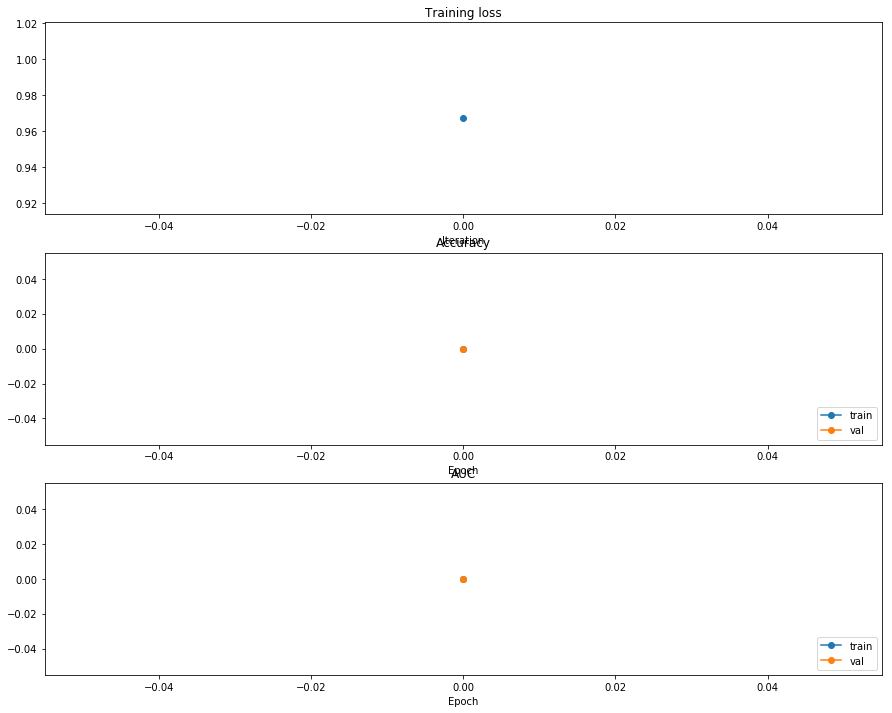

In [ ]:
data_vis.nnplot(nn_model)

In [ ]:
#data_vis.nnplot(best_net)
train_hist

# Try a specific one:

In [ ]:
train_hist

# We train for ensemble this time

In [ ]:
from MY_NN import NeuralNetwork
from datetime import datetime

best_net = None
best_auc =0

#10.22. for 4 layers, best one has lr 3.305e-4, wd is 9.904e-3 0.6374
input_size = 237
hidden_size= [230,220,210]
lr_decay = {'step_size': 25, 'gamma':0.1}
for i in range(5):
    #learnning_rate 5e-4 too large
    train_hist={}
    tic = datetime.now()
    weight_decay = 10** (np.random.uniform(-3,-1))#L2 
    learning_rate = 10** (np.random.uniform(-4,np.log10(5e-4)))
    dropout = np.random.uniform(0,1)
    nn_model = NeuralNetwork(data,input_size = input_size, hidden_size=hidden_size,learning_rate = learning_rate,num_epochs=70,verbose=None,dropout=dropout,
                             weight_decay=weight_decay,lr_decay=lr_decay ,batchnorm=True)
    nn_model.train()
    describe= 'Learning rate is {}. Weight decay is {}. dropout is {}\n Val aus is {}. Train auc is {}' \
                .format(learning_rate, weight_decay, dropout,nn_model.auc_history['val'][-1],nn_model.auc_history['train'][-1])

    print(describe)
    train_hist['describe']= describe
    train_hist['net'] = nn_model
    toc = datetime.now()
    print('This is round you consume {} time to run this model.'.format(toc-tic))
    print('You have finished {}!!'.format(i+1))

    filename= 'search_lr_wd_ensemble{}.pkl'.format(i)
    with open(filename, 'wb') as f:
        pickle.dump(train_hist, f)

In [10]:
! rm search_lr_wd_ensemble0.pkl

In [15]:
import data_util
import data_preprocess
from sklearn.model_selection import train_test_split
from datetime import datetime
import numpy as np 

rso = np.random.RandomState(66)

train_data = data_util.load_train_data()
test_data= data_util.load_test_data()

lv1_pre = data_preprocess.preprocess_cell()

X_train = train_data.drop(['id','target'],axis=1)
y_train = train_data['target']
X_test = test_data.drop(['id'],axis=1)



X_train, y_train, col = lv1_pre.process(X_train, y=y_train, rso =rso, oversample= None)
X_test = lv1_pre.process(X_test,test=True,rso =rso)
X_dev, y_dev = X_train.iloc[:100000,:], y_train.iloc[:100000]

In [16]:
data ={}
#enter df here
data['X_train'] = X_train.values
data['X_val'] = X_dev.values
data['y_train'] = y_train.values
data['y_val'] =y_dev.values
#X_train = None
#X_val = None
#print(type(X_train),type(y_train))

In [19]:
from MY_NN import NeuralNetwork
from datetime import datetime
import torch

best_net = None
best_auc =0

#10.22. for 4 layers, best one has lr 3.305e-4, wd is 9.904e-3 0.6374
input_size = 238
hidden_size= [220,200,200]
lr_decay = {'step_size': 6, 'gamma':0.5}

train_hist={}
X_test_tensor = torch.from_numpy(X_test.values)
sub = pd.DataFrame()



for i, (weight_decay, learning_rate)  in enumerate(learn_list):
    tic = datetime.now()
#     dropout = np.random.uniform(0.5,1)
#     weight_decay = 10** (np.random.uniform(-1,1))#L2 
#     learning_rate = 10** (np.random.uniform(-4,-2))
    
    
    dropout = 0.75
    #During this training, I will set 1e-3 as upper bound for learning_rate, 0.1 for upper bound of weight_decay
    
    nn_model = NeuralNetwork(input_size = input_size, hidden_size=hidden_size,
                             learning_rate = learning_rate,num_epochs=100,batch_size =512,
                             verbose=True,dropout=dropout,
                             weight_decay=weight_decay,lr_decay=lr_decay)
    try:
        nn_model.train(data)
        describe= 'Learning rate is {}. Weight decay is {}. dropout is {}\n Val aus is {}. Train auc is {}' \
                    .format(learning_rate, weight_decay, dropout,nn_model.auc_history['val'][-1],nn_model.auc_history['train'][-1])
        train_hist[(nn_model.auc_history['val'][-1],nn_model.auc_history['train'][-1])]= describe
        print(describe)
        out = nn_model.test(X_test_tensor).data.numpy()[:,1]
        sub['NN'+str(i)] = out
        toc = datetime.now()
        print('This is round you consume {} time to run this model.'.format(toc-tic))
        print('You have finished {}!!'.format(i+1))
    except:
        describe= 'BLOWINGUP: Learning rate is {}. Weight decay is {}. dropout is {}\n Val aus is {}. Train auc is {}' \
                    .format(learning_rate, weight_decay, dropout,nn_model.auc_history['val'][-1],nn_model.auc_history['train'][-1])
        train_hist[(nn_model.auc_history['val'][-1],nn_model.auc_history['train'][-1])]= describe
        print(describe)
        print("WARNING: YOUR TRAINING IS BLOWING UP THIS TIME!")

sub.to_csv('final_NN.csv', index=False)

Epoch 0: iteration 0, the loss is [ 0.9746893]
  acc for train: 0.963552482140817, acc for val: 0.96329
  auc for train: 0.4721207474209999, auc for val: 0.4736403189470083
--------------------------------------------------------------
BLOWINGUP: Learning rate is 0.04687949688795907. Weight decay is 0.0005358686327667781. dropout is 0.75
 Val aus is 0.4736403189470083. Train auc is 0.4721207474209999
Epoch 0: iteration 0, the loss is [ 1.30615878]
  acc for train: 0.963552482140817, acc for val: 0.96329
  auc for train: 0.4721815523648501, auc for val: 0.4648010585171117
--------------------------------------------------------------
BLOWINGUP: Learning rate is 0.03493291532559407. Weight decay is 0.00029890640322661804. dropout is 0.75
 Val aus is 0.4648010585171117. Train auc is 0.4721815523648501
Epoch 0: iteration 0, the loss is [ 0.99644208]
  acc for train: 0.963552482140817, acc for val: 0.96329
  auc for train: 0.5105895328189008, auc for val: 0.5121401359233897
----------------

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from numba import jit
import time
import gc
import data_util 

def eval_gini(y_true, y_prob):
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    ntrue = 0
    gini = 0
    delta = 0
    n = len(y_true)
    for i in range(n-1, -1, -1):
        y_i = y_true[i]
        ntrue += y_i
        gini += y_i * delta
        delta += 1 - y_i
    gini = 1 - 2 * gini / (ntrue * (n - ntrue))
    return gini

def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))


train_df = data_util.load_train_data()
test_df = data_util.load_test_data()

train_features = [
    "ps_car_13",  #            : 1571.65 / shadow  609.23
    "ps_reg_03",  #            : 1408.42 / shadow  511.15
    "ps_ind_05_cat",  #        : 1387.87 / shadow   84.72
    "ps_ind_03",  #            : 1219.47 / shadow  230.55
    "ps_ind_15",  #            :  922.18 / shadow  242.00
    "ps_reg_02",  #            :  920.65 / shadow  267.50
    "ps_car_14",  #            :  798.48 / shadow  549.58
    "ps_car_12",  #            :  731.93 / shadow  293.62
    "ps_car_01_cat",  #        :  698.07 / shadow  178.72
    "ps_car_07_cat",  #        :  694.53 / shadow   36.35
    "ps_ind_17_bin",  #        :  620.77 / shadow   23.15
    "ps_car_03_cat",  #        :  611.73 / shadow   50.67
    "ps_reg_01",  #            :  598.60 / shadow  178.57
    "ps_car_15",  #            :  593.35 / shadow  226.43
    "ps_ind_01",  #            :  547.32 / shadow  154.58
    "ps_ind_16_bin",  #        :  475.37 / shadow   34.17
    "ps_ind_07_bin",  #        :  435.28 / shadow   28.92
    "ps_car_06_cat",  #        :  398.02 / shadow  212.43
    "ps_car_04_cat",  #        :  376.87 / shadow   76.98
    "ps_ind_06_bin",  #        :  370.97 / shadow   36.13
    "ps_car_09_cat",  #        :  214.12 / shadow   81.38
    "ps_car_02_cat",  #        :  203.03 / shadow   26.67
    "ps_ind_02_cat",  #        :  189.47 / shadow   65.68
    "ps_car_11",  #            :  173.28 / shadow   76.45
    "ps_car_05_cat",  #        :  172.75 / shadow   62.92
    "ps_calc_09",  #           :  169.13 / shadow  129.72
    "ps_calc_05",  #           :  148.83 / shadow  120.68
    "ps_ind_08_bin",  #        :  140.73 / shadow   27.63
    "ps_car_08_cat",  #        :  120.87 / shadow   28.82
    "ps_ind_09_bin",  #        :  113.92 / shadow   27.05
    "ps_ind_04_cat",  #        :  107.27 / shadow   37.43
    "ps_ind_18_bin",  #        :   77.42 / shadow   25.97
    "ps_ind_12_bin",  #        :   39.67 / shadow   15.52
    "ps_ind_14",  #            :   37.37 / shadow   16.65
]

# add combinations
combs = [
    ('ps_reg_01', 'ps_car_02_cat'),  
    ('ps_reg_01', 'ps_car_04_cat'),
]


def target_encode(trn_series=None,    # Revised to encode validation series
                  val_series=None,
                  tst_series=None,
                  target=None,
                  min_samples_leaf=1,
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior
    """
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index
    ft_val_series = pd.merge(
        val_series.to_frame(val_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=val_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_val_series.index = val_series.index
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_val_series, noise_level), add_noise(ft_tst_series, noise_level)


# Process data
id_test = test_df['id'].values
id_train = train_df['id'].values
y = train_df['target']

start = time.time()

combs = [
    ('ps_reg_01', 'ps_car_02_cat'),  
    ('ps_reg_01', 'ps_car_04_cat'),
]
for n_c, (f1, f2) in enumerate(combs):
    name1 = f1 + "_plus_" + f2
    print('current feature %60s %4d in %5.1f'
          % (name1, n_c + 1, (time.time() - start) / 60), end='')
    print('\r' * 75, end='')
    train_df[name1] = train_df[f1].apply(lambda x: str(x)) + "_" + train_df[f2].apply(lambda x: str(x))
    test_df[name1] = test_df[f1].apply(lambda x: str(x)) + "_" + test_df[f2].apply(lambda x: str(x))
    # Label Encode
    lbl = LabelEncoder()
    lbl.fit(list(train_df[name1].values) + list(test_df[name1].values))
    train_df[name1] = lbl.transform(list(train_df[name1].values))
    test_df[name1] = lbl.transform(list(test_df[name1].values))

    train_features.append(name1)


#########################
# train_df['na_sum'] = (train_df == -1).sum(axis=1)
# train_df['na_ca_t_sum'] = (train_df[f_cats] == -1).sum(axis=1)
# test_df['na_sum'] = (test_df == -1).sum(axis=1)
# test_df['na_ca_t_sum'] = (test_df[f_cats] == -1).sum(axis=1)

# train_features += ['na_ca_t_sum', 'na_sum']

train_df['ps_car_13_+_ps_reg_03'] = train_df['ps_car_13'] + train_df['ps_reg_03']
train_df['ps_car_13_-_ps_reg_03'] = train_df['ps_car_13'] - train_df['ps_reg_03']
train_df['ps_car_13_x_ps_reg_03'] = train_df['ps_car_13'] * train_df['ps_reg_03']
train_df['ps_car_13_/_ps_reg_03'] = train_df['ps_car_13'] / train_df['ps_reg_03']

test_df['ps_car_13_+_ps_reg_03'] = test_df['ps_car_13'] + test_df['ps_reg_03']
test_df['ps_car_13_-_ps_reg_03'] = test_df['ps_car_13'] - test_df['ps_reg_03']
test_df['ps_car_13_x_ps_reg_03'] = test_df['ps_car_13'] * test_df['ps_reg_03']
test_df['ps_car_13_/_ps_reg_03'] = test_df['ps_car_13'] / test_df['ps_reg_03']


train_features+= ['ps_car_13_x_ps_reg_03', 'ps_car_13_/_ps_reg_03','ps_car_13_+_ps_reg_03','ps_car_13_-_ps_reg_03']

X = train_df[train_features]
test_df = test_df[train_features]
f_cats = [f for f in X.columns if "_cat" in f]    



current feature                                 ps_reg_01_plus_ps_car_04_cat    2 in   0.0

In [9]:
X.describe()

,ps_car_13,ps_reg_03,ps_ind_05_cat,ps_ind_03,ps_ind_15,ps_reg_02,ps_car_14,ps_car_12,ps_car_01_cat,ps_car_07_cat,...,ps_ind_04_cat,ps_ind_18_bin,ps_ind_12_bin,ps_ind_14,ps_reg_01_plus_ps_car_02_cat,ps_reg_01_plus_ps_car_04_cat,ps_car_13_x_ps_reg_03,ps_car_13_/_ps_reg_03,ps_car_13_+_ps_reg_03,ps_car_13_-_ps_reg_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.00000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.813265,0.551102,0.405188,4.423318,7.299922,0.439184,0.276256,0.379945,8.295933,0.910027,...,0.416794,0.153446,0.009439,0.012451,16.703544,61.82433,0.465909,0.685398,1.364367,0.262163
std,0.224588,0.793506,1.350642,2.699902,3.546042,0.404264,0.357154,0.058327,2.508270,0.347106,...,0.493311,0.360417,0.096693,0.127545,7.100134,28.83025,0.721817,0.801999,0.845887,0.802906
min,0.250619,-1.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-3.092035,-3.092035,-0.691277,-3.453098
25%,0.670867,0.525000,0.000000,2.000000,5.000000,0.200000,0.333167,0.316228,7.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,12.000000,40.00000,0.353514,0.544906,1.204588,-0.212443
50%,0.765811,0.720677,0.000000,4.000000,7.000000,0.300000,0.368782,0.374166,7.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,19.000000,70.00000,0.542125,0.852464,1.491923,0.045800
75%,0.906190,1.000000,0.000000,6.000000,10.000000,0.600000,0.396485,0.400000,11.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,24.000000,90.00000,0.825184,1.156926,1.857717,0.341294
max,3.720626,4.037945,6.000000,11.000000,13.000000,1.800000,0.636396,1.264911,11.000000,1.000000,...,1.000000,1.000000,1.000000,4.000000,24.000000,99.00000,8.840192,15.059844,5.998826,4.092035


In [3]:
from MY_NN import NeuralNetwork
from datetime import datetime

kf = KFold(n_splits = 5, random_state = 1, shuffle = True)
from sklearn.preprocessing import StandardScaler

y_test_pred_all = np.zeros((len(test_df),5))

for i, (train_index, test_index) in enumerate(kf.split(train_df)):
    
    # Create data for this fold
    y_train, y_valid = y.iloc[train_index].copy(), y.iloc[test_index]
    X_train, X_valid = X.iloc[train_index,:].copy(), X.iloc[test_index,:].copy()
    X_test = test_df.copy()
    print( "\nFold ", i)
    
    
    for f in f_cats:
        X_train[f + "_avg"], X_valid[f + "_avg"], X_test[f + "_avg"] = target_encode(
                                                        trn_series=X_train[f],
                                                        val_series=X_valid[f],
                                                        tst_series=X_test[f],
                                                        target=y_train,
                                                        min_samples_leaf=200,
                                                        smoothing=10,
                                                        noise_level=0
                                                        )
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train= scaler.transform(X_train)
    X_valid = scaler.transform(X_valid)
    X_test = scaler.transform(X_test)
    # Run model for this fold
    best_net = None
    best_auc =0

    #10.22. for 4 layers, best one has lr 3.305e-4, wd is 9.904e-3 0.6374
    input_size = 54
    hidden_size= [230,220,210]
    lr_decay = {'step_size': 30, 'gamma':0.1}
    #learnning_rate 5e-4 too large
    train_hist={}
    tic = datetime.now()
    weight_decay = 0.08
    learning_rate = 0.01
    dropout = None
    data ={}
    data['X_train'] = X_train
    data['X_val'] = X_valid
    data['y_train'] = y_train.values
    data['y_val'] =y_valid.values
    nn_model = NeuralNetwork(input_size = input_size, hidden_size=hidden_size,
                             learning_rate = learning_rate,num_epochs=70,verbose=True,dropout=dropout,
                             weight_decay=weight_decay,lr_decay=lr_decay ,batchnorm=True)
    nn_model.train(data)
    describe= 'Learning rate is {}. Weight decay is {}. dropout is {}\n Val aus is {}. Train auc is {}' \
                .format(learning_rate, weight_decay, dropout,nn_model.auc_history['val'][-1],nn_model.auc_history['train'][-1])

    print(describe)
    train_hist['describe']= describe
    train_hist['net'] = nn_model
    toc = datetime.now()
    print('This is round you consume {} time to run this model.'.format(toc-tic))
    print('You have finished {}!!'.format(i+1))

    filename= 'search_lr_wd_ensemble{}.pkl'.format(i)
        
    # Generate validation predictions for this fold
    pred = fit_model.predict_proba(X_valid)[:,1]
    print( "  Gini = ", eval_gini(y_valid, pred) )
    y_valid_pred.iloc[test_index] = pred
    
    # Accumulate test set predictions
    y_test_pred_all[:,i] = fit_model.predict_proba(X_test)[:,1]
    
    break


Fold  0
sddsd
{'dropout': None, 'lr_decay': {'gamma': 0.1, 'step_size': 30}, 'verbose': True, 'input_size': 54, 'learning_rate': 0.01, 'weight_decay': 0.08, 'batchnorm': True, 'hidden_size': [230, 220, 210], 'num_epochs': 70}
Epoch 0: iteration 0, the loss is [ 0.78651083]
  acc for train: 0.9635087542448164, acc for val: 0.9635593861041808
  auc for train: 0.5867404153739948, auc for val: 0.5914332609299277
--------------------------------------------------------------
Epoch 0: iteration 100, the loss is [ 0.17065661]
  acc for train: 0.9635423557602448, acc for val: 0.9635929874079114
  auc for train: 0.488435814111397, auc for val: 0.4747470689892394
--------------------------------------------------------------
Epoch 0: iteration 200, the loss is [ 0.1929232]
  acc for train: 0.9635423557602448, acc for val: 0.9635929874079114
  auc for train: 0.5972034540029725, auc for val: 0.5975308034834141
--------------------------------------------------------------
Epoch 0: iteration 300, 

Process Process-5:
Process Process-6:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_queue.get()
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 342, in get
    with self._rlock:
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes()
  

KeyboardInterrupt: 

In [22]:
data['X_train'].shape

(476169, 54)